# Tanzania Tourism Prediction Project

This notebook analyzes tourist data from Tanzania to predict tourist expenditure.

##  SETUP AND INITIALIZATION

In [1]:
# pip install jupyter-black

In [2]:
load_ext jupyter_black

In [3]:
# Import necessary libraries and set up the environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import os
import missingno as mno
import pickle
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

warnings.filterwarnings("ignore")


RSEED = 42  # Random Seed for reproducibility

# Set plotting style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("rainbow")

# Set random seed for reproducibility
np.random.seed(42)

# Create directories if they don't exist
# os.makedirs("../data/processed", exist_ok=True)
# os.makedirs("../models", exist_ok=True)
# os.makedirs("../reports/figures", exist_ok=True)

print("STEP 1 - Setup and initialization completed")
print("=" * 50)

STEP 1 - Setup and initialization completed


##  LOAD DATA

In [4]:
# Load the dataset files and display basic information

print("\nSTEP 2 - LOAD DATA")
print("=" * 50)

# Load the data
df = pd.read_csv("../data/Train.csv")

var_def = pd.read_csv("../data/VariableDefinitions.csv")

print(f"Training set shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding target variable

# Display the first few rows
print("\nFirst 5 rows of the training data:")
print(df.head())

# Display variable definitions
print("\nVariable Definitions:")
print(var_def)


STEP 2 - LOAD DATA
Training set shape: (4809, 23)
Number of features: 22

First 5 rows of the training data:
          ID         country age_group        travel_with  total_female   
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0  \
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity   
0         1.0            Leisure and Holidays  Wildlife tourism  \
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour

## CHECK DATA QUALITY

In [5]:
# Examine data types, summary statistics, and missing values

print("\nSTEP 3 - CHECK DATA QUALITY")
print("=" * 50)

# Check data types and missing values
print("\nData types and missing values in training set:")
print(df.info())

# Summary statistics
print("\nSummary statistics for numerical features:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_pct})
missing_df = missing_df[missing_df["Missing Values"] > 0].sort_values(
    "Percentage", ascending=False
)

print("\nMissing values in training set:")
print(missing_df)


STEP 3 - CHECK DATA QUALITY

Data types and missing values in training set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non

## EXPLORATORY DATA ANALYSIS (EDA) and FE

#### mapping continent

In [6]:
# Define a mapping of countries to continents with lowercase first letters
country_to_continent = {
    "SWIZERLAND": "europe",
    "UNITED KINGDOM": "europe",
    "CHINA": "asia",
    "SOUTH AFRICA": "africa",
    "UNITED STATES OF AMERICA": "north america",
    "NIGERIA": "africa",
    "INDIA": "asia",
    "BRAZIL": "south america",
    "CANADA": "north america",
    "MALT": "europe",
    "MOZAMBIQUE": "africa",
    "RWANDA": "africa",
    "AUSTRIA": "europe",
    "MYANMAR": "asia",
    "GERMANY": "europe",
    "KENYA": "africa",
    "ALGERIA": "africa",
    "IRELAND": "europe",
    "DENMARK": "europe",
    "SPAIN": "europe",
    "FRANCE": "europe",
    "ITALY": "europe",
    "EGYPT": "africa",
    "QATAR": "asia",
    "MALAWI": "africa",
    "JAPAN": "asia",
    "SWEDEN": "europe",
    "NETHERLANDS": "europe",
    "UAE": "asia",
    "UGANDA": "africa",
    "AUSTRALIA": "oceania",
    "YEMEN": "asia",
    "NEW ZEALAND": "oceania",
    "BELGIUM": "europe",
    "NORWAY": "europe",
    "ZIMBABWE": "africa",
    "ZAMBIA": "africa",
    "CONGO": "africa",
    "BURGARIA": "europe",
    "PAKISTAN": "asia",
    "GREECE": "europe",
    "MAURITIUS": "africa",
    "DRC": "africa",
    "OMAN": "asia",
    "PORTUGAL": "europe",
    "KOREA": "asia",
    "SWAZILAND": "africa",
    "TUNISIA": "africa",
    "KUWAIT": "asia",
    "DOMINICA": "north america",
    "ISRAEL": "asia",
    "FINLAND": "europe",
    "CZECH REPUBLIC": "europe",
    "UKRAIN": "europe",
    "ETHIOPIA": "africa",
    "BURUNDI": "africa",
    "SCOTLAND": "europe",
    "RUSSIA": "europe",
    "GHANA": "africa",
    "NIGER": "africa",
    "MALAYSIA": "asia",
    "COLOMBIA": "south america",
    "LUXEMBOURG": "europe",
    "NEPAL": "asia",
    "POLAND": "europe",
    "SINGAPORE": "asia",
    "LITHUANIA": "europe",
    "HUNGARY": "europe",
    "INDONESIA": "asia",
    "TURKEY": "asia",
    "TRINIDAD TOBACCO": "north america",
    "IRAQ": "asia",
    "SLOVENIA": "europe",
    "UNITED ARAB EMIRATES": "asia",
    "COMORO": "africa",
    "SRI LANKA": "asia",
    "IRAN": "asia",
    "MONTENEGRO": "europe",
    "ANGOLA": "africa",
    "LEBANON": "asia",
    "SLOVAKIA": "europe",
    "ROMANIA": "europe",
    "MEXICO": "north america",
    "LATVIA": "europe",
    "CROATIA": "europe",
    "CAPE VERDE": "africa",
    "SUDAN": "africa",
    "COSTARICA": "north america",
    "CHILE": "south america",
    "NAMIBIA": "africa",
    "TAIWAN": "asia",
    "SERBIA": "europe",
    "LESOTHO": "africa",
    "GEORGIA": "asia",
    "PHILIPINES": "asia",
    "IVORY COAST": "africa",
    "MADAGASCAR": "africa",
    "DJIBOUT": "africa",
    "CYPRUS": "europe",
    "ARGENTINA": "south america",
    "URUGUAY": "south america",
    "MORROCO": "africa",
    "THAILAND": "asia",
    "BERMUDA": "north america",
    "ESTONIA": "europe",
}

# Map the countries to continents and create a new column
df["continent"] = df["country"].map(country_to_continent)


# Display the updated DataFrame
display(df.head(2))

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,continent
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,europe
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,europe


In [7]:
# delete rows with 0 in total_female AND total_male
df = df.loc[
    ~(
        (df["total_female"].isna() | (df["total_female"] == 0))
        & (df["total_male"].isna() | (df["total_male"] == 0))
    )
]

# fill missing values with 0 in total_female and total_male
df[["total_female", "total_male"]] = df[["total_female", "total_male"]].fillna(0)

display(df[df[["total_female", "total_male"]].isna().any(axis=1)])
display(df.shape)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,continent


(4792, 24)

In [8]:
# For most_impressing (categorical)

df["most_impressing"] = df["most_impressing"].fillna("Friendly People")
print(f"   - Filled missing values in most_impressing with : {'Friendly People'}")
# Step 5.2: Feature Engineering
print("5.2 Feature Engineering")
# Create total_nights feature
df["total_nights"] = df["night_mainland"] + df["night_zanzibar"]
print("   - Created total_nights feature (sum of night_mainland and night_zanzibar)")
# Create total_people feature
df["total_people"] = df["total_female"] + df["total_male"]
print("   - Created total_people feature (sum of total_female and total_male)")
# For travel_with (categorical with high missingness)
travel_with_fill = df.apply(
    lambda row: (
        "Alone"
        if pd.isna(row["travel_with"])
        or row["travel_with"] == 0
        and row["total_people"] == 1
        else (
            "Friends/Relatives"
            if pd.isna(row["travel_with"])
            or row["travel_with"] == 0
            and row["total_people"] > 2
            else row["travel_with"]
        )
    ),
    axis=1,
)
df["travel_with"] = travel_with_fill

print(f"   - Filled missing values in travel_with with mode: {travel_with_fill}")
print(df.isna().sum())
print(df.isna().sum().sum())
display(df.shape)

   - Filled missing values in most_impressing with : Friendly People
5.2 Feature Engineering
   - Created total_nights feature (sum of night_mainland and night_zanzibar)
   - Created total_people feature (sum of total_female and total_male)
   - Filled missing values in travel_with with mode: 0       Friends/Relatives
1                   Alone
2                   Alone
3                  Spouse
4                   Alone
              ...        
4804                Alone
4805               Spouse
4806                Alone
4807    Friends/Relatives
4808               Spouse
Length: 4792, dtype: object
ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sights

(4792, 26)

## Visualizing


STEP 4 - EXPLORATORY DATA ANALYSIS


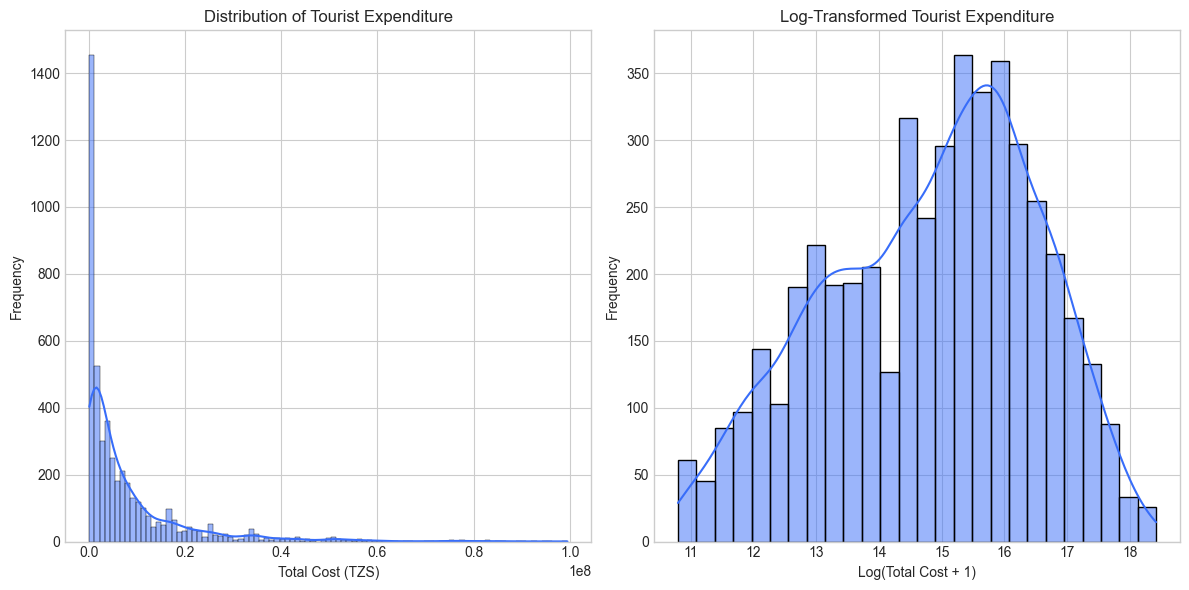

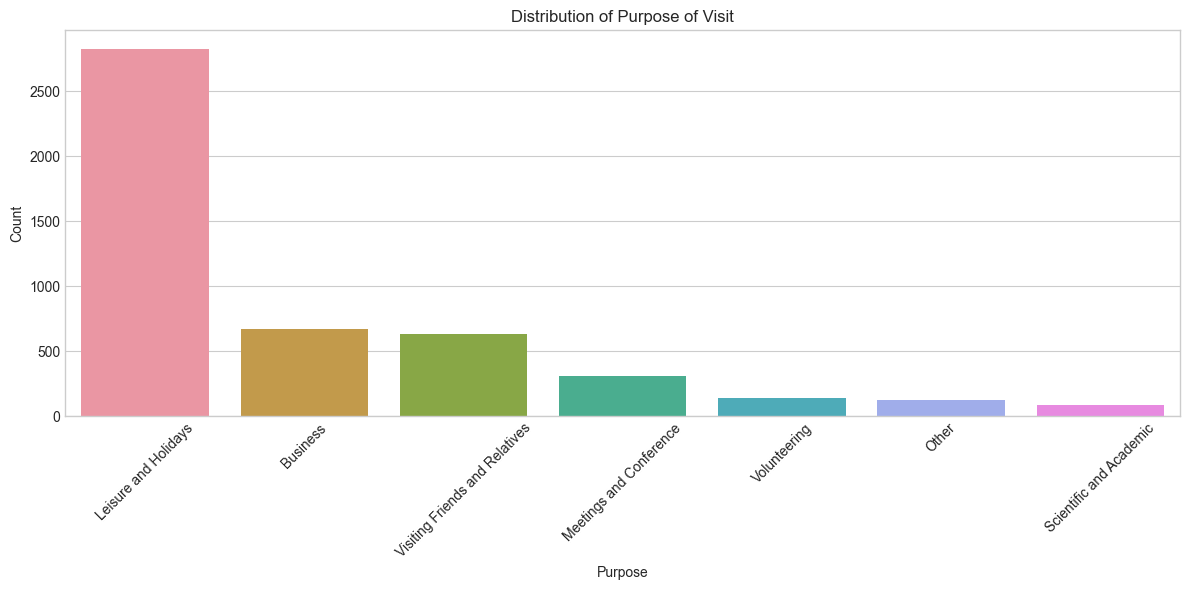

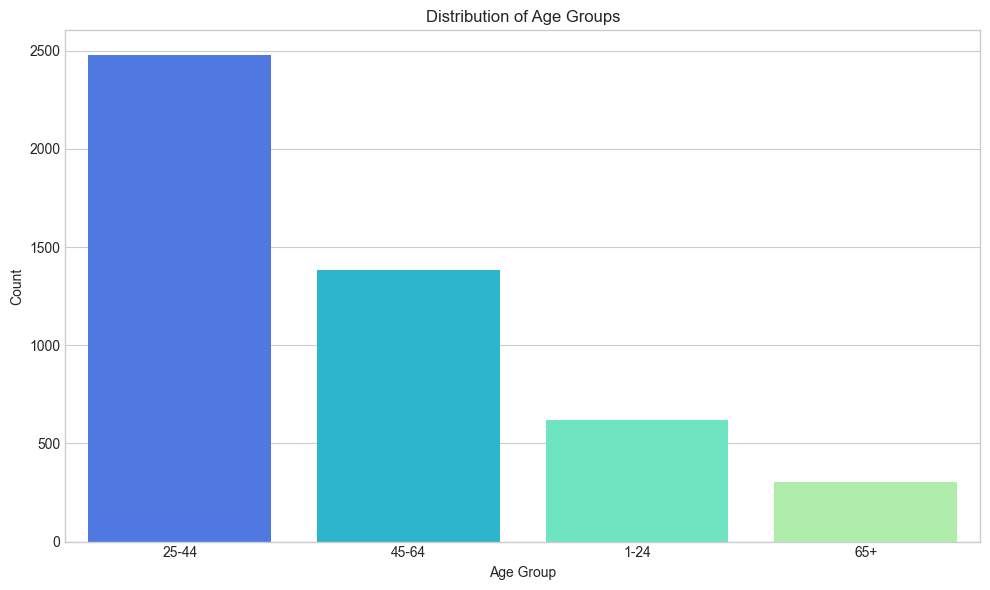

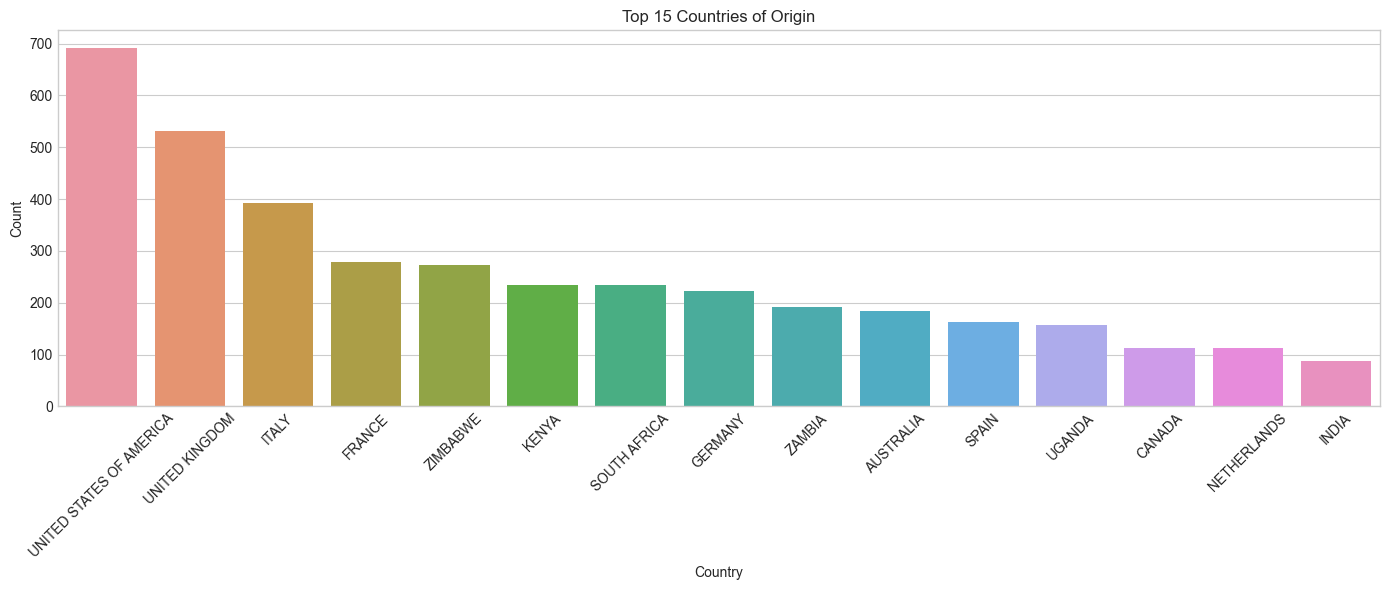

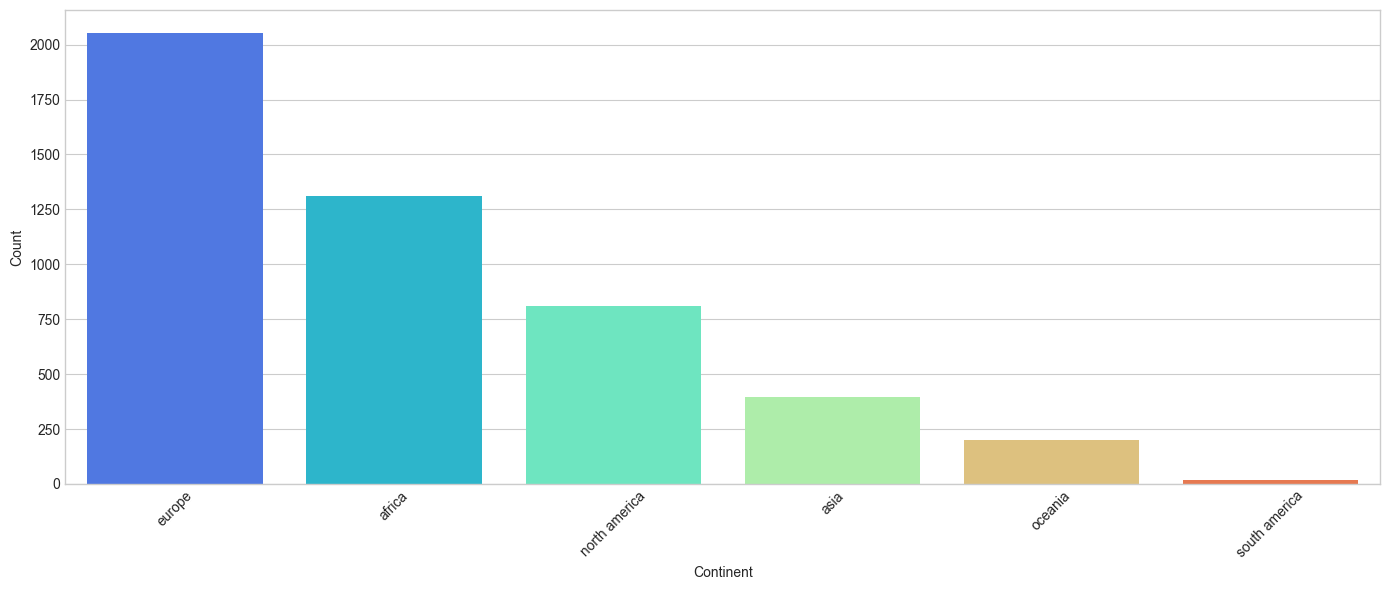

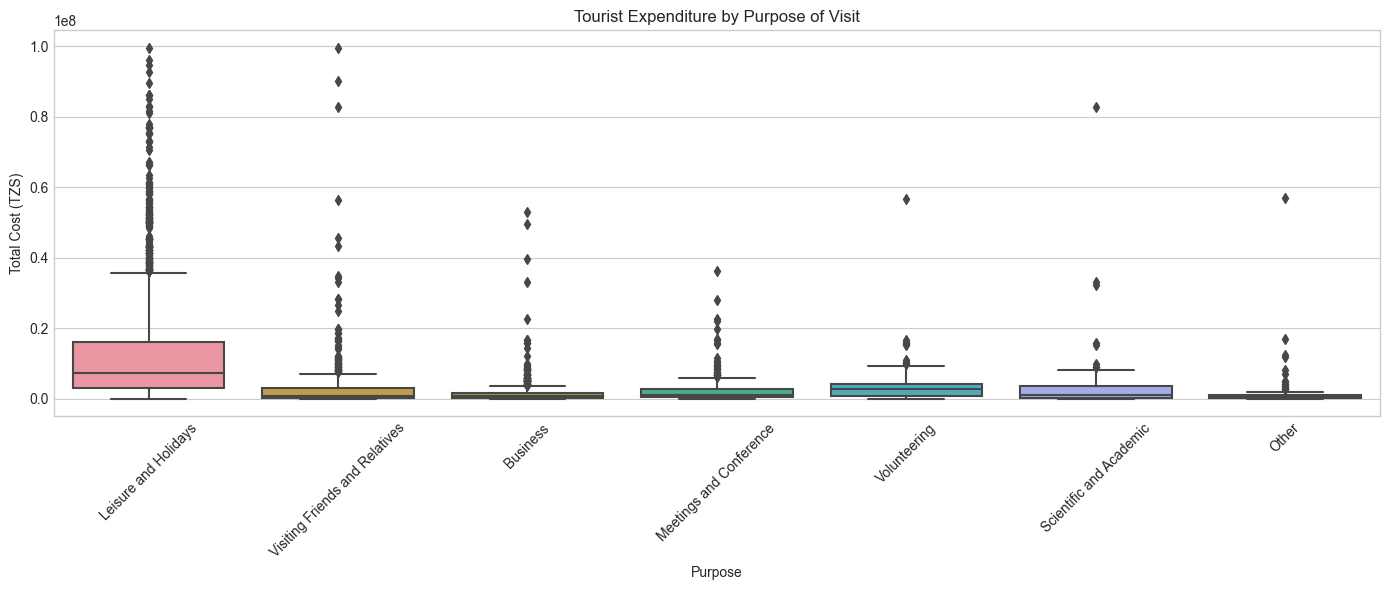

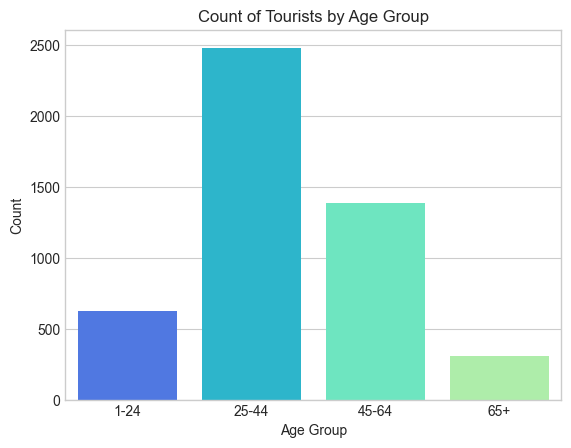

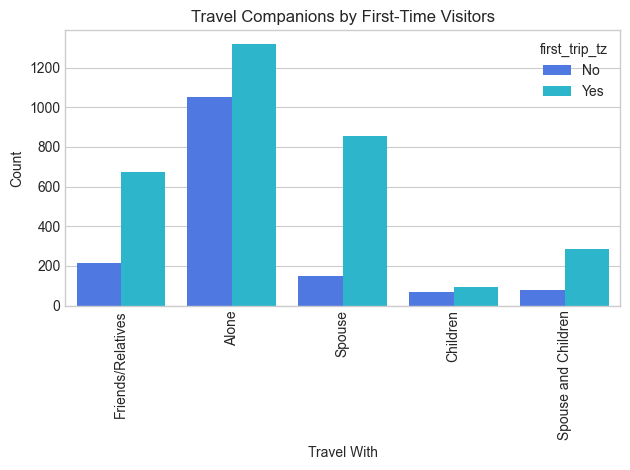

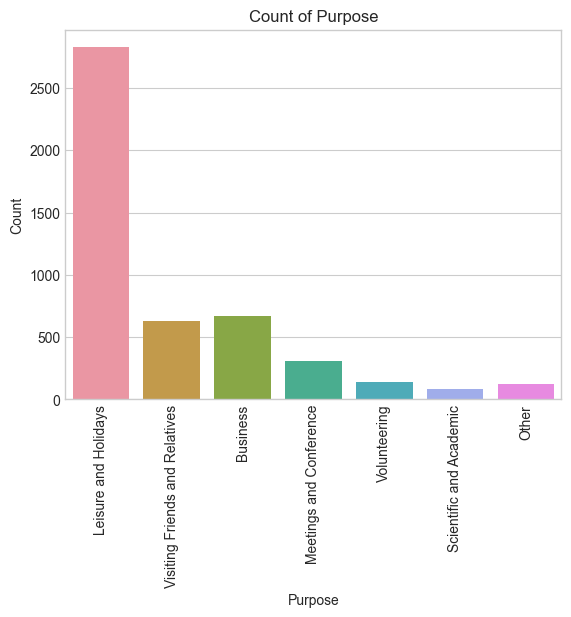

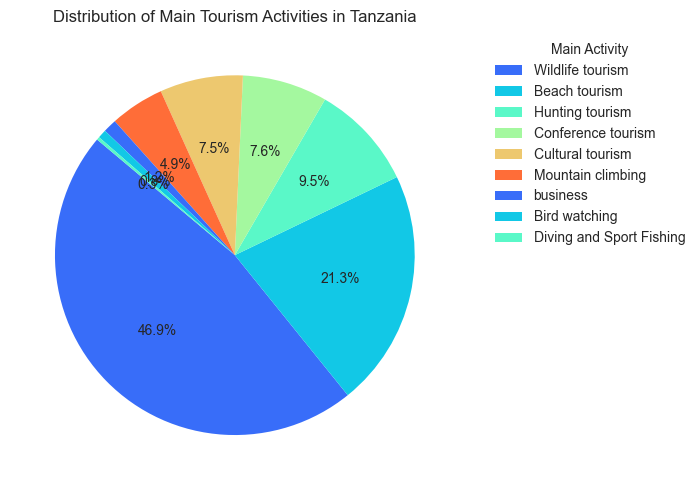

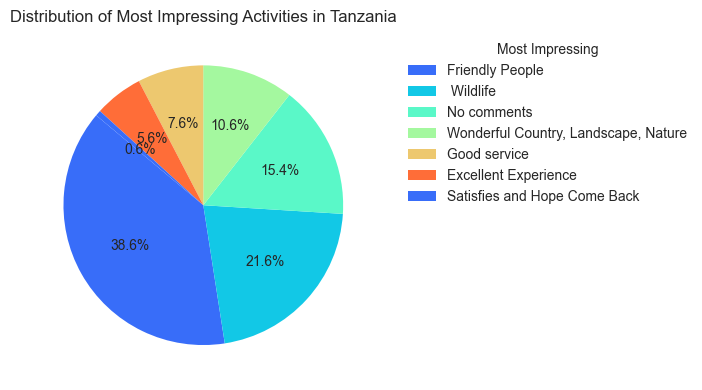

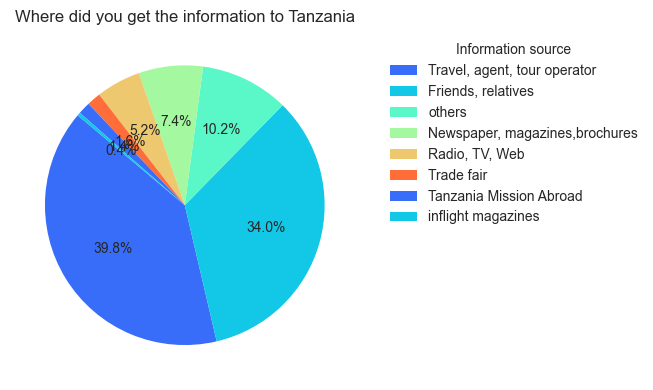

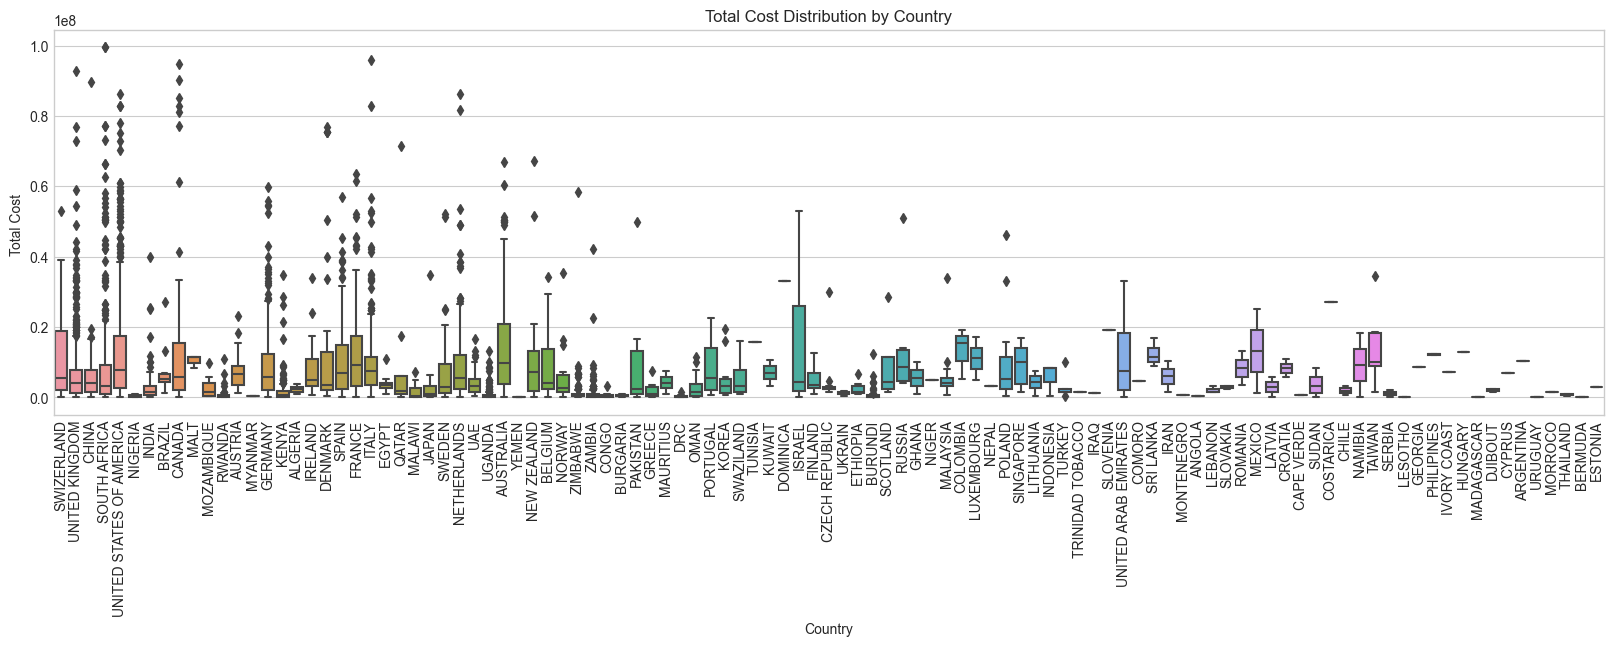

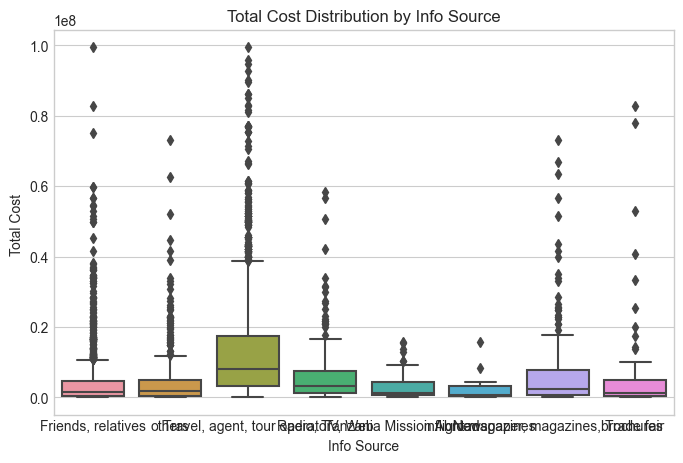

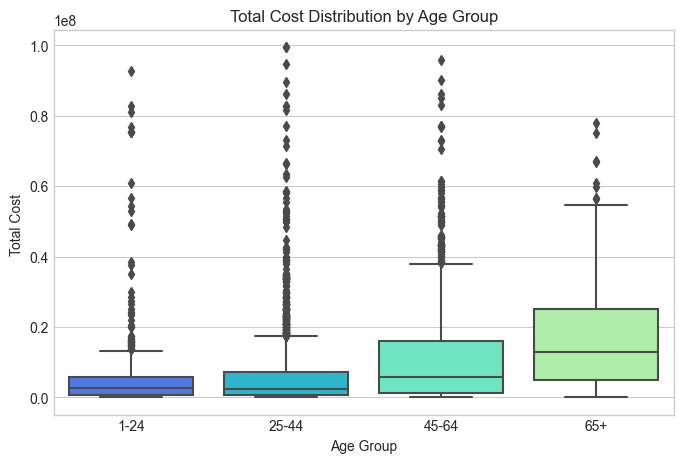

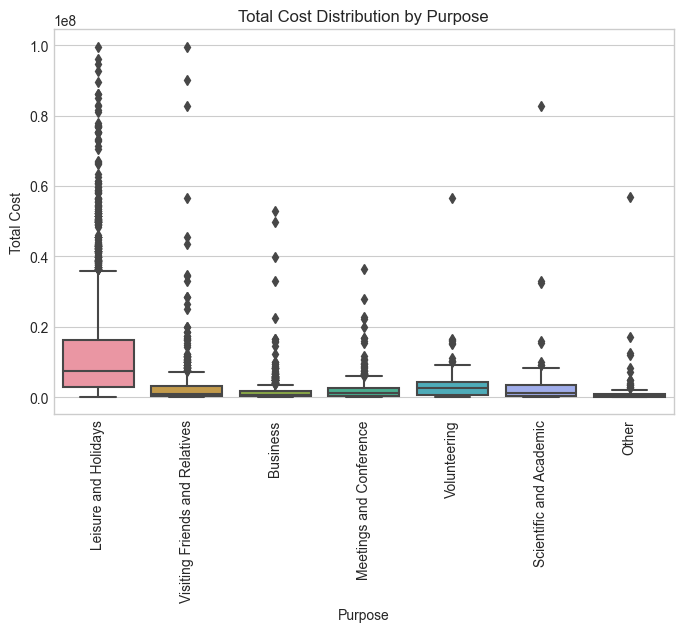

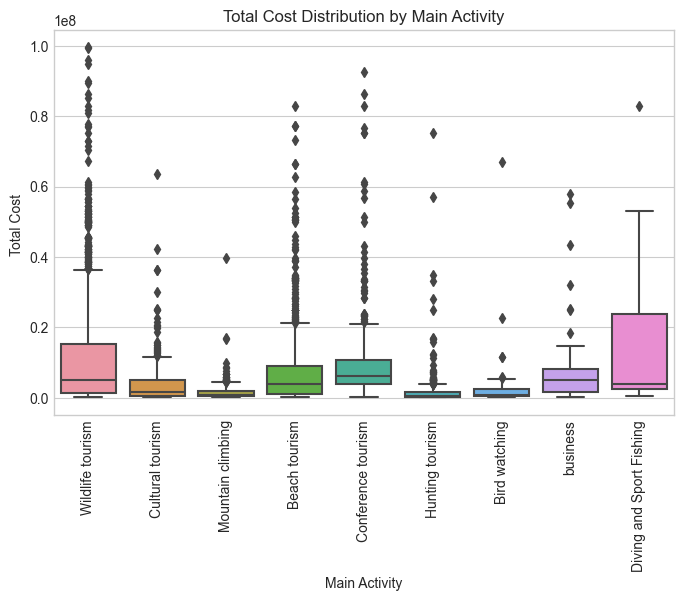

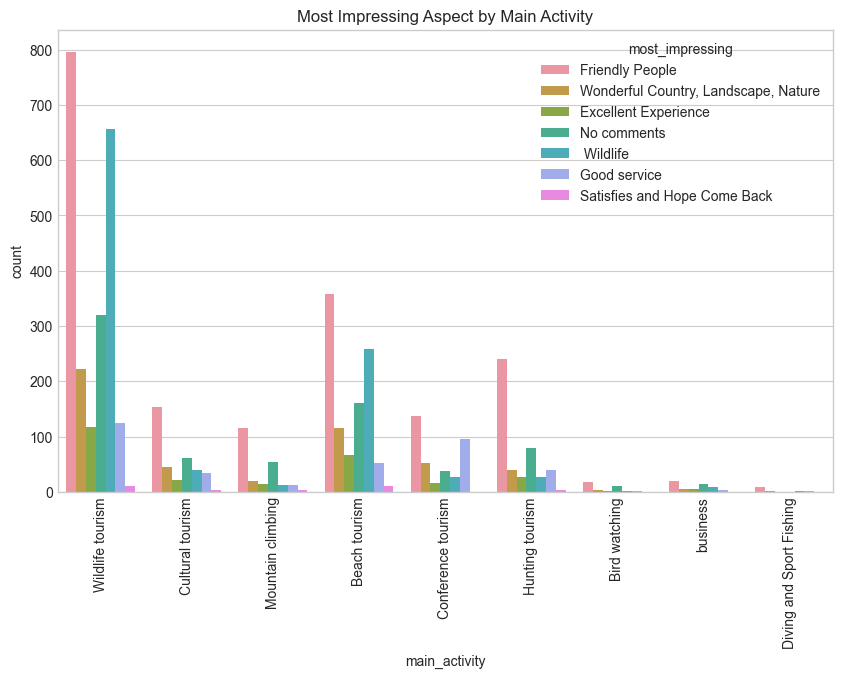

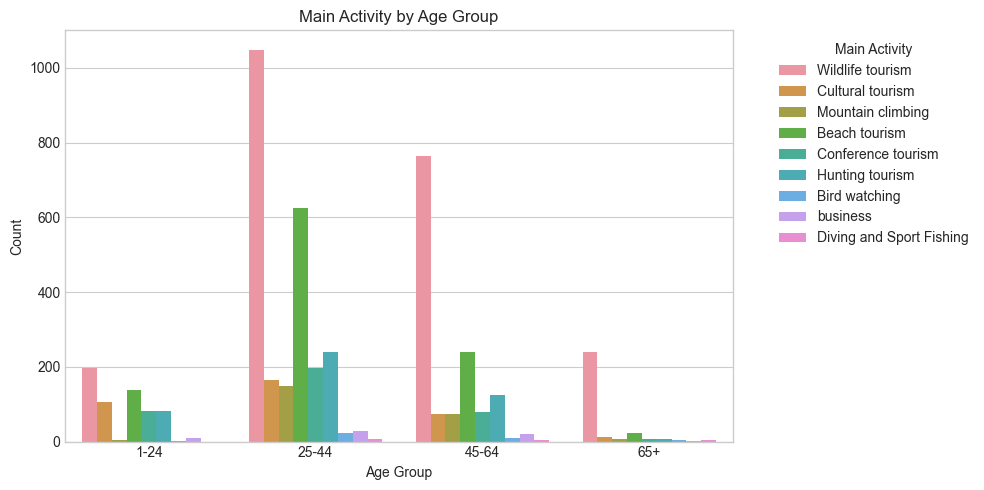

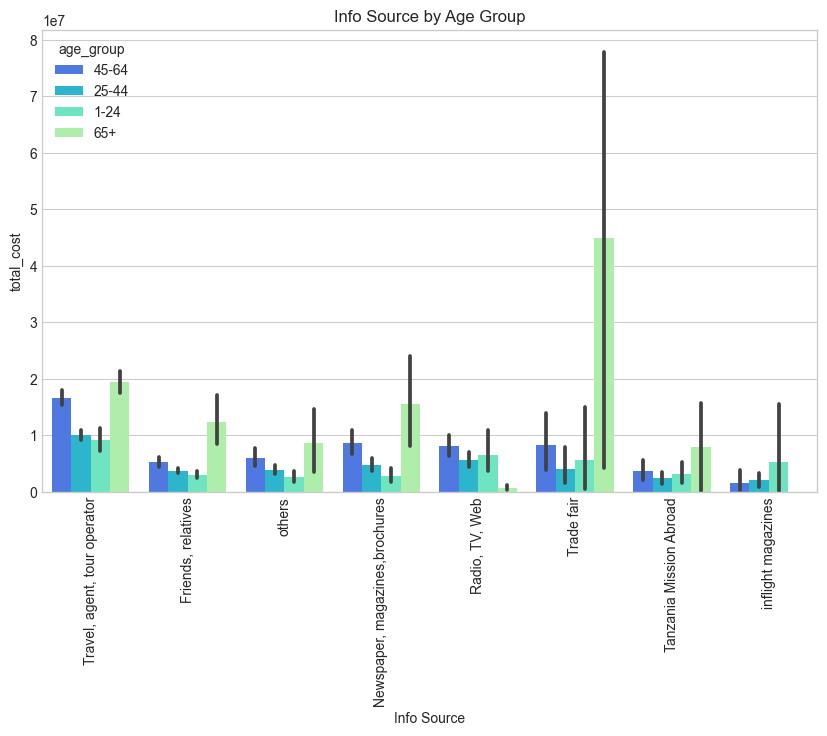

In [9]:
# Visualize data distributions and relationships


print("\nSTEP 4 - EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Distribution of target variable
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["total_cost"], kde=True)
plt.title("Distribution of Tourist Expenditure")
plt.xlabel("Total Cost (TZS)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df["total_cost"]), kde=True)
plt.title("Log-Transformed Tourist Expenditure")
plt.xlabel("Log(Total Cost + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
# plt.savefig("../reports/figures/target_distribution.png")
plt.show()

# Purpose of visit distribution
plt.figure(figsize=(12, 6))
purpose_counts = df["purpose"].value_counts()
sns.barplot(x=purpose_counts.index, y=purpose_counts.values)
plt.title("Distribution of Purpose of Visit")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("../reports/figures/purpose_distribution.png")
plt.show()

# Age group distribution
plt.figure(figsize=(10, 6))
age_counts = df["age_group"].value_counts()
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
# plt.savefig("../reports/figures/age_distribution.png")
plt.show()

# Top 15 countries of origin
plt.figure(figsize=(14, 6))
country_counts = df["country"].value_counts().head(15)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top 15 Countries of Origin")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("../reports/figures/country_distribution.png")
plt.show()


# rank continent
plt.figure(figsize=(14, 6))
conti_counts = df["continent"].value_counts().head(15)
sns.barplot(x=conti_counts.index, y=conti_counts.values)
plt.title("")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("../reports/figures/country_distribution.png")
plt.show()


# Boxplot of total_cost by purpose
plt.figure(figsize=(14, 6))
sns.boxplot(x="purpose", y="total_cost", data=df)
plt.title("Tourist Expenditure by Purpose of Visit")
plt.xlabel("Purpose")
plt.ylabel("Total Cost (TZS)")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("../reports/figures/cost_by_purpose.png")
plt.show()

# Define the desired order for the age groups
age_order = ["1-24", "25-44", "45-64", "65+"]
# Plot using the order
sns.countplot(x="age_group", data=df, order=age_order)
plt.title("Count of Tourists by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

sns.countplot(
    x="travel_with",
    hue="first_trip_tz",
    data=df,
)
plt.title("Travel Companions by First-Time Visitors")
plt.xlabel("Travel With")
plt.ylabel("Count")
# plt.legend(title="First Trip to Tanzania")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot using the order
sns.countplot(x="purpose", data=df)
plt.title("Count of Purpose")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Get value counts
activity_counts = df["main_activity"].value_counts()
# Plot pie chart
plt.figure(figsize=(8, 5))
plt.pie(activity_counts, autopct="%1.1f%%", startangle=140)
plt.legend(
    activity_counts.index,
    title="Main Activity",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.title("Distribution of Main Tourism Activities in Tanzania")
plt.tight_layout()
plt.show()

# Get value counts
impress_counts = df["most_impressing"].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(impress_counts, autopct="%1.1f%%", startangle=140)
plt.legend(
    impress_counts.index,
    title="Most Impressing",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.title("Distribution of Most Impressing Activities in Tanzania")
plt.tight_layout()
plt.show()

# Get value counts
source_counts = df["info_source"].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(source_counts, autopct="%1.1f%%", startangle=140)
plt.legend(
    source_counts.index,
    title="Information source",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)
plt.title("Where did you get the information to Tanzania")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 5))
sns.boxplot(x="country", y="total_cost", data=df)
plt.title("Total Cost Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Total Cost ")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="info_source", y="total_cost", data=df)
plt.title("Total Cost Distribution by Info Source")
plt.xlabel("Info Source")
plt.ylabel("Total Cost ")
plt.show()


age_order = ["1-24", "25-44", "45-64", "65+"]
plt.figure(figsize=(8, 5))
sns.boxplot(x="age_group", y="total_cost", order=age_order, data=df)
plt.title("Total Cost Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Cost ")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="purpose", y="total_cost", data=df)
plt.title("Total Cost Distribution by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Total Cost")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="main_activity", y="total_cost", data=df)
plt.title("Total Cost Distribution by Main Activity")
plt.xlabel("Main Activity")
plt.ylabel("Total Cost ")
plt.xticks(rotation=90)
plt.show()

pd.crosstab(df["main_activity"], df["most_impressing"])
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="main_activity", hue="most_impressing")
plt.xticks(rotation=90)
plt.title("Most Impressing Aspect by Main Activity")
plt.show()

age_order = ["1-24", "25-44", "45-64", "65+"]
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="age_group", hue="main_activity", order=age_order)
plt.title("Main Activity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Main Activity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


pd.crosstab(df["info_source"], df["age_group"])
plt.figure(figsize=(10, 6))
info_order = df["info_source"].value_counts().index
sns.barplot(data=df, x="info_source", y="total_cost", hue="age_group", order=info_order)
plt.xlabel("Info Source")
plt.xticks(rotation=90)
plt.title("Info Source by Age Group")
plt.show()

## Preprocessing

In [10]:
df = df.drop(columns=["ID"])

In [11]:
# Identify categorical columns and numerical columns

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_cols.remove("total_cost")  # Exclude target variable
print(f"   - Categorical columns: {len(categorical_cols)} columns")
print(f"   - Categorical columns: {categorical_cols}")
print(f"   - Numerical columns: {len(numerical_cols)} columns")
print(f"   - Numerical columns: {numerical_cols}")

   - Categorical columns: 18 columns
   - Categorical columns: ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'payment_mode', 'first_trip_tz', 'most_impressing', 'continent']
   - Numerical columns: 6 columns
   - Numerical columns: ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_nights', 'total_people']


In [12]:
df.shape

(4792, 25)

In [13]:
df2 = df.copy()  # for baseline

In [14]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Logtransform target variable
df["total_cost"] = np.log1p(df["total_cost"])

## Step 9 3/4 - Train Test Split


In [15]:
# defining features and target variables

X = df.drop(columns=["total_cost"])
y = df["total_cost"]

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RSEED
)

In [16]:
# scaling for numerical features

scaler = MinMaxScaler()
scaler2 = MinMaxScaler()


X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


y_train = scaler2.fit_transform(y_train.to_frame())
y_test = scaler2.transform(y_test.to_frame())

In [17]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3833, 161)

(3833, 1)

(959, 161)

(959, 1)

In [18]:
X_train.isna().sum().sum()

0

##  MODEL DEVELOPMENT


In [19]:
# creating evaluation function for models


# List to store model results
model_results = []


# Function to evaluate and log model performance
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):

    import time

    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on validation set
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Calculate metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_test = mean_absolute_error(y_test, y_pred)
    mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2_test = r2_score(y_test, y_pred)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    r2_train = r2_score(y_train, y_pred_train)

    # Reverse the log transformation for MAE ------ still needs work???-------
    # yytr = np.expm1(y_train)
    # yyte = np.expm1(y_test)
    # yypr = np.expm1(y_pred)
    # mae_tz = mean_absolute_error(yyte, yypr)  # Convert to TZS
    # mae_eur = mae_tz / 2950

    # Calculate training time
    training_time = time.time() - start_time

    # Print results
    print(f"\nModel: {model_name}")
    print("-" * 30)
    print(f"Training Time: {training_time:.4f} seconds")
    print("")
    print("Train DataSet")
    print(f"Mean Absolute Error: {mae_train:.4f}")
    print(f"Mean Absolute Percentage Error: {mape_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"R2 Score: {r2_train:.4f}")
    print("______")
    print("Test DataSet")
    print(f"Mean Absolute Error: {mae_test:.4f}")
    print(f"Mean Absolute Percentage Error: {mape_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R2 Score: {r2_test:.4f}")
    print("__________________________________________")
    print("")

    # Save model
    # model_path = f'../models/{model_name.replace(" ", "_").lower()}.pkl'
    # with open(model_path, "wb") as model_file:
    #  pickle.dump(model, model_file)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted Total Cost:  {model_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return {
        "model": model,
        "name": model_name,
        "rmse_train": rmse_train,
        "mae_train": mae_train,
        "r2_train": r2_train,
        "rmse_test": rmse_test,
        "mae_test": mae_test,
        # "mae_tz": mae_tz,
        # "mae_eur": mae_eur,
        "r2_test": r2_test,
        "training_time": training_time,
    }

### Baseline model

X_train shape: (3833, 24)
y_train shape: (3833,)
X_test shape: (959, 24)
y_test shape: (959,)
   - Categorical columns: 9 columns
   - Categorical columns: ['travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'payment_mode', 'first_trip_tz', 'most_impressing', 'continent']
   - Numerical columns: 15 columns
   - Numerical columns: ['total_female', 'total_male', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'night_mainland', 'night_zanzibar', 'total_nights', 'total_people', 'package', 'age_group_encoded']
Intercept: 13.6019
Coefficients: [ 2.79254024e+11  2.45053157e+11  1.64494342e+12  1.78673958e+12
  1.77433765e+12  1.75236691e+12  1.66143119e+12  1.67434279e+12
  1.28413227e+12  2.04923058e+11  8.71466302e+10 -2.13046483e+11
 -4.12741372e+11 -9.59617136e+12  1.62400000e-01  4.43500000e-01
  3.99600000e-01  4.62200000e-01  7.99600000e-01  3.46300000e

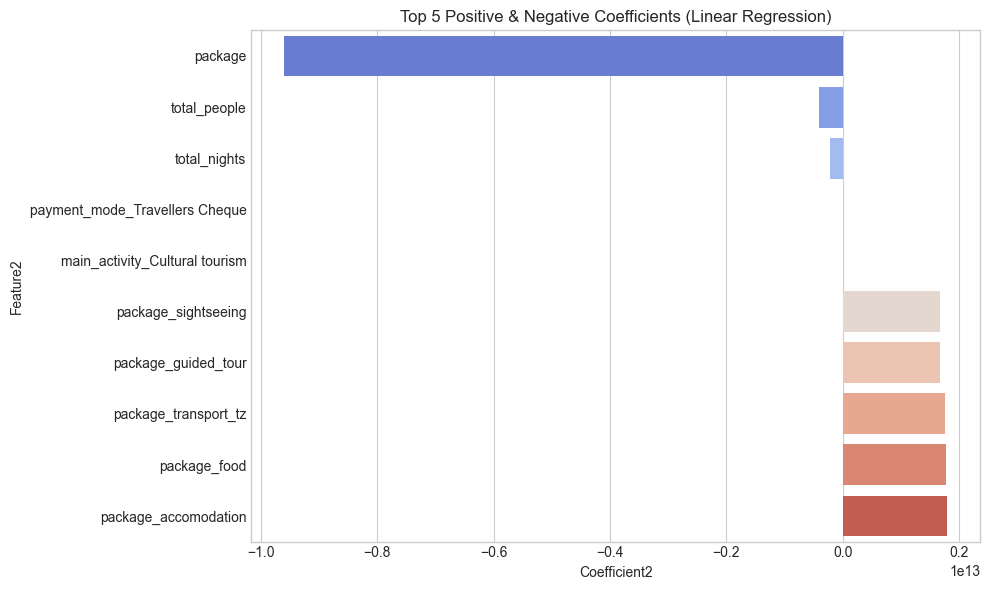

In [20]:
columns_to_convert = [
    "package_transport_int",
    "package_accomodation",
    "package_food",
    "package_transport_tz",
    "package_sightseeing",
    "package_guided_tour",
    "package_insurance",
]


df2["total_cost"] = np.log1p(df2["total_cost"])
df2[columns_to_convert] = (
    df2[columns_to_convert].replace({"Yes": 1, "No": 0}).astype(int)
)


# One-hot encode the specified columns


df2["package"] = (
    df2["package_transport_int"]
    + df2["package_accomodation"]
    + df2["package_food"]
    + df2["package_transport_tz"]
    + df2["package_sightseeing"]
    + df2["package_guided_tour"]
    + df2["package_insurance"]
)

# df2["package"] = df2["package"].astype(int)
df2["age_group_encoded"] = LabelEncoder().fit_transform(df2["age_group"])
df2 = df2.drop(["age_group", "country"], axis=1)

X2 = df2.drop("total_cost", axis=1)
y2 = df2["total_cost"]


# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=RSEED
)

# Split before preprocessing
# X_train3, X_test3, y_train3, y_test3 = train_test_split(
#    X3, y3, test_size=0.2, random_state=42
# )

# y_train3 = np.expm1(y_train3)
# y_test3 = np.expm1(y_test3)

# Check the shape of the data sets
print("X_train shape:", X_train2.shape)
print("y_train shape:", y_train2.shape)
print("X_test shape:", X_test2.shape)
print("y_test shape:", y_test2.shape)
categorical_cols2 = df2.select_dtypes(include=["object"]).columns.tolist()
numerical_cols2 = df2.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_cols2.remove("total_cost")  # Exclude target variable
print(f"   - Categorical columns: {len(categorical_cols2)} columns")
print(f"   - Categorical columns: {categorical_cols2}")
print(f"   - Numerical columns: {len(numerical_cols2)} columns")
print(f"   - Numerical columns: {numerical_cols2}")
# Redefine categorical columns after age_group was encoded
#
# Preprocessing pipeline
preprocessor2 = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols2),
        ("cat", OneHotEncoder(drop="first"), categorical_cols2),
    ]
)

# Pipeline_1 (base model)
lr_model_base = Pipeline(
    steps=[
        ("preprocessor2", preprocessor2),
        ("model", LinearRegression()),  # change to your model of choice
    ]
)
# lr_model_base = LinearRegression()
lr_model_base.fit(X_train2, y_train2)
# Predict
y_pred_lr_base = lr_model_base.predict(X_test2)
# Extract the linear model from the pipeline
model_base = lr_model_base.named_steps["model"]
# Print results
intercept_base = model_base.intercept_
slope_base = model_base.coef_
print("Intercept:", intercept_base.round(4))
print("Coefficients:", slope_base.round(4))
# Assuming 'X_train' is your training feature DataFrame
# Extract the feature names from the training set after preprocessing (e.g., one-hot encoding)

# Get the feature names after preprocessing
preprocessor_transformer2 = lr_model_base.named_steps["preprocessor2"]
numeric_features2 = X_train2.select_dtypes(include=["float64", "int64"]).columns
categorical_features2 = X_train2.select_dtypes(include=["object"]).columns
print(f"Numeric features2: {numeric_features2}")
print(f"Categorical features2: {categorical_features2}")


# Get the feature names after applying OneHotEncoder for categorical variables
if categorical_features2.size > 0:
    # Handle one-hot encoding feature names
    onehot_encoder2 = preprocessor_transformer2.transformers_[1][
        1
    ]  # Access OneHotEncoder in the pipeline
    categorical_column_names2 = onehot_encoder2.get_feature_names_out(
        categorical_features2
    )
else:
    categorical_column_names2 = []

# Combine numeric and categorical features after preprocessing
all_feature_names2 = list(numeric_features2) + list(categorical_column_names2)

# Now print the coefficients with corresponding feature names
coefficients2 = model_base.coef_

# Combine feature names and coefficients into a DataFrame for better visualization
coef_df2 = pd.DataFrame({"Feature2": all_feature_names2, "Coefficient2": coefficients2})
# Sort the DataFrame by the 'Coefficient2' column in ascending order
coef_df_sorted2 = coef_df2.sort_values(by="Coefficient2", ascending=True)

# Print the coefficients rounded to 4 decimal places
print(coef_df_sorted2.round(4))
top_n2 = 5
top_coef2 = pd.concat([coef_df_sorted2.head(top_n2), coef_df_sorted2.tail(top_n2)])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_coef2, x="Coefficient2", y="Feature2", palette="coolwarm")
plt.title(f"Top {top_n2} Positive & Negative Coefficients (Linear Regression)")
plt.tight_layout()
plt.show()


Model: Baseline Model - Lin. Reg.
------------------------------
Training Time: 0.1417 seconds

Train DataSet
Mean Absolute Error: 0.8438
Mean Absolute Percentage Error: 5.9483
RMSE: 1.1253
R2 Score: 0.5487
______
Test DataSet
Mean Absolute Error: 0.8782
Mean Absolute Percentage Error: 6.2200
RMSE: 1.1801
R2 Score: 0.5211
__________________________________________



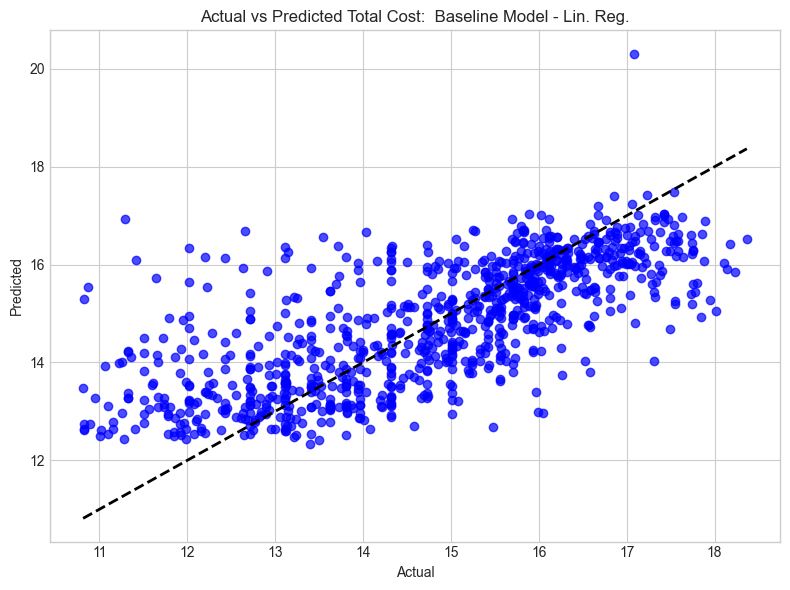

In [21]:
# base line


base_lr_model_result = evaluate_model(
    lr_model_base, "Baseline Model - Lin. Reg.", X_train2, y_train2, X_test2, y_test2
)

model_results.append(base_lr_model_result)

## Models

### Running different Models. All already pdated wit the results of the respective GridSearchCV/RandomizedSearchCV (see Step "Hyperparametertuning)


6.1 Training Linear Models:

Model: Ridge Regression
------------------------------
Training Time: 0.0194 seconds

Train DataSet
Mean Absolute Error: 0.1082
Mean Absolute Percentage Error: inf
RMSE: 0.1443
R2 Score: 0.5693
______
Test DataSet
Mean Absolute Error: 0.1114
Mean Absolute Percentage Error: 117.7153
RMSE: 0.1496
R2 Score: 0.5535
__________________________________________



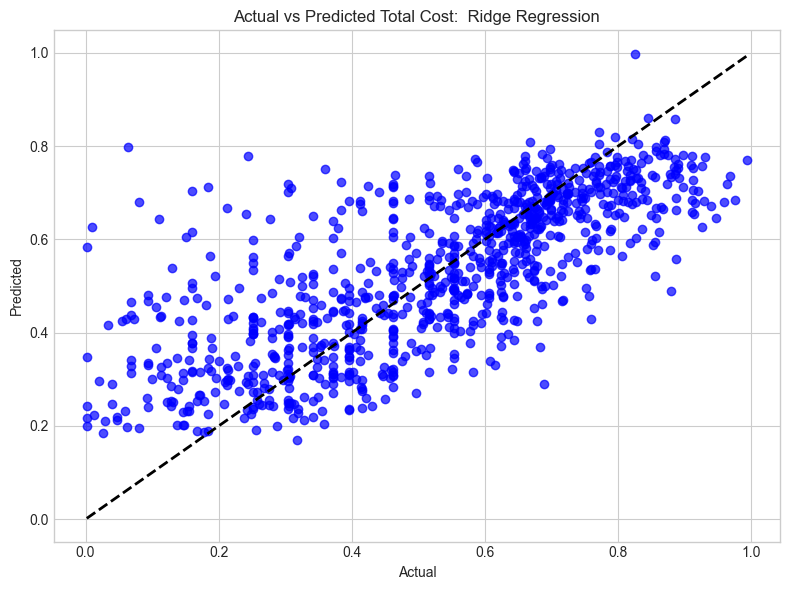


Model: Lasso Regression
------------------------------
Training Time: 0.3482 seconds

Train DataSet
Mean Absolute Error: 0.1332
Mean Absolute Percentage Error: inf
RMSE: 0.1686
R2 Score: 0.4120
______
Test DataSet
Mean Absolute Error: 0.1326
Mean Absolute Percentage Error: 196.7752
RMSE: 0.1726
R2 Score: 0.4059
__________________________________________



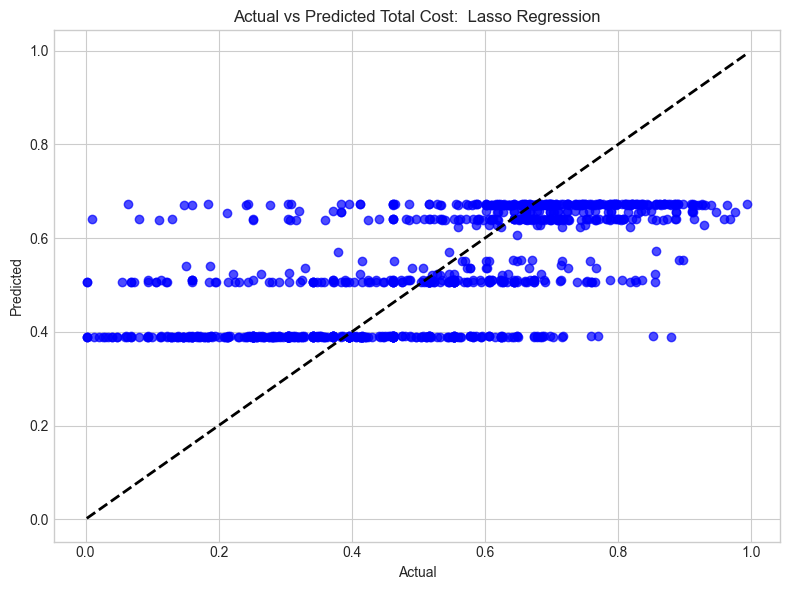


Model: Elastic Net Regression
------------------------------
Training Time: 0.3139 seconds

Train DataSet
Mean Absolute Error: 0.1145
Mean Absolute Percentage Error: inf
RMSE: 0.1507
R2 Score: 0.5304
______
Test DataSet
Mean Absolute Error: 0.1157
Mean Absolute Percentage Error: 198.8218
RMSE: 0.1551
R2 Score: 0.5200
__________________________________________



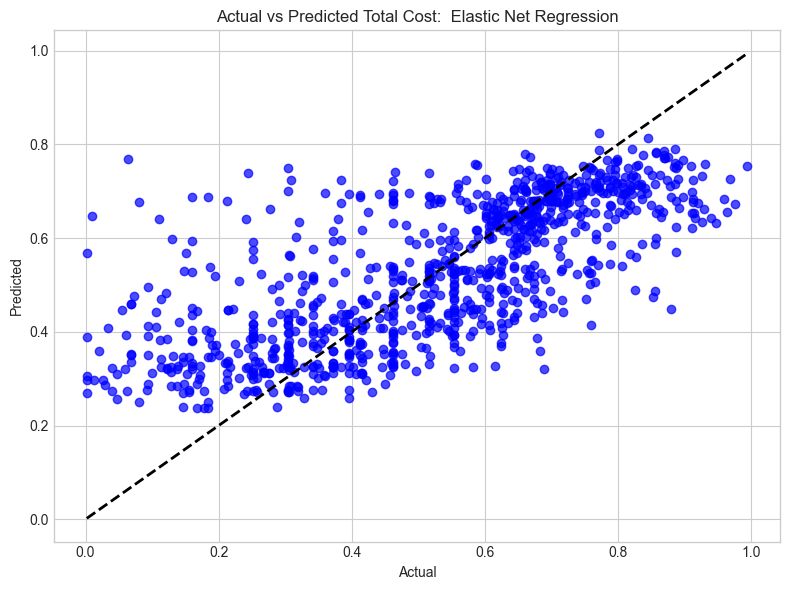


Model: Polynomial Features Elastic Net Regression
------------------------------
Training Time: 7.4466 seconds

Train DataSet
Mean Absolute Error: 0.1123
Mean Absolute Percentage Error: inf
RMSE: 0.1483
R2 Score: 0.5452
______
Test DataSet
Mean Absolute Error: 0.1152
Mean Absolute Percentage Error: 199.0165
RMSE: 0.1542
R2 Score: 0.5255
__________________________________________



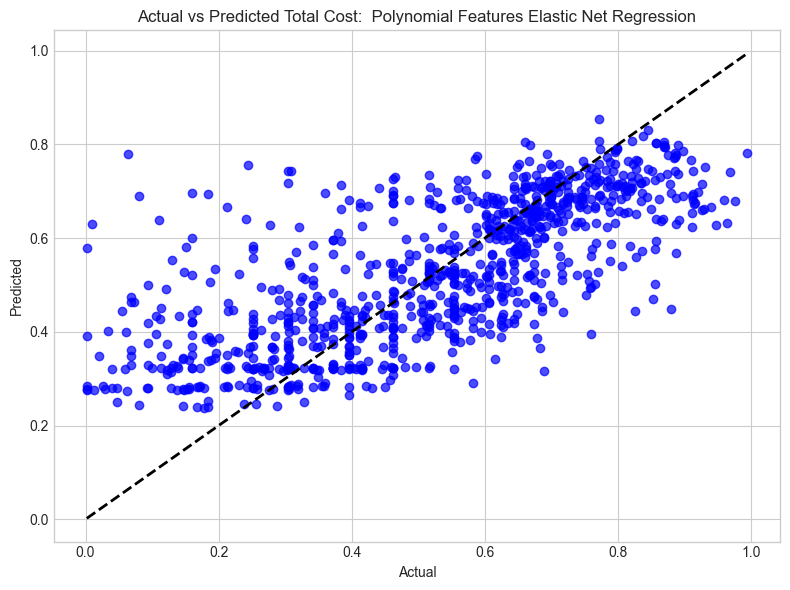


Model: Polynomial Features Ridge Regression
------------------------------
Training Time: 6.7370 seconds

Train DataSet
Mean Absolute Error: 0.1018
Mean Absolute Percentage Error: inf
RMSE: 0.1356
R2 Score: 0.6201
______
Test DataSet
Mean Absolute Error: 0.1127
Mean Absolute Percentage Error: 121.3211
RMSE: 0.1497
R2 Score: 0.5528
__________________________________________



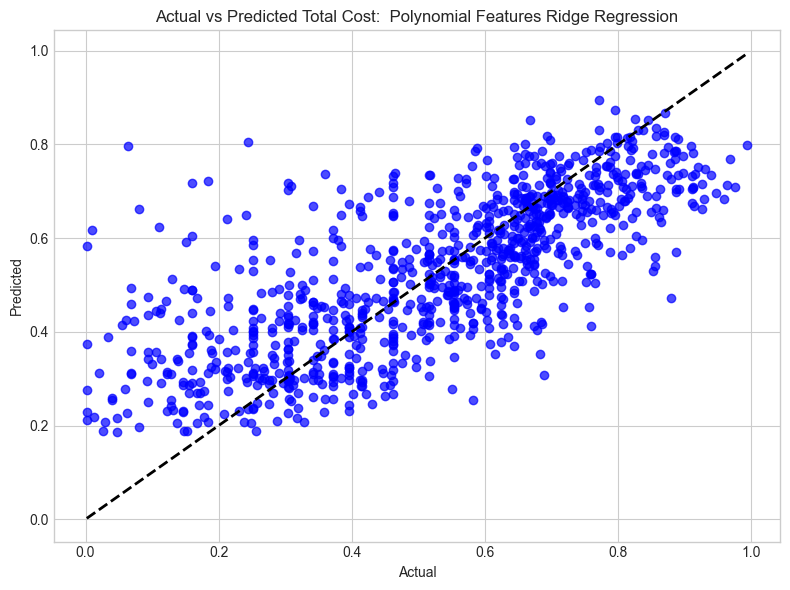


Model: Random Forest
------------------------------
Training Time: 8.4623 seconds

Train DataSet
Mean Absolute Error: 0.0822
Mean Absolute Percentage Error: inf
RMSE: 0.1146
R2 Score: 0.7286
______
Test DataSet
Mean Absolute Error: 0.1078
Mean Absolute Percentage Error: 203.0190
RMSE: 0.1480
R2 Score: 0.5631
__________________________________________



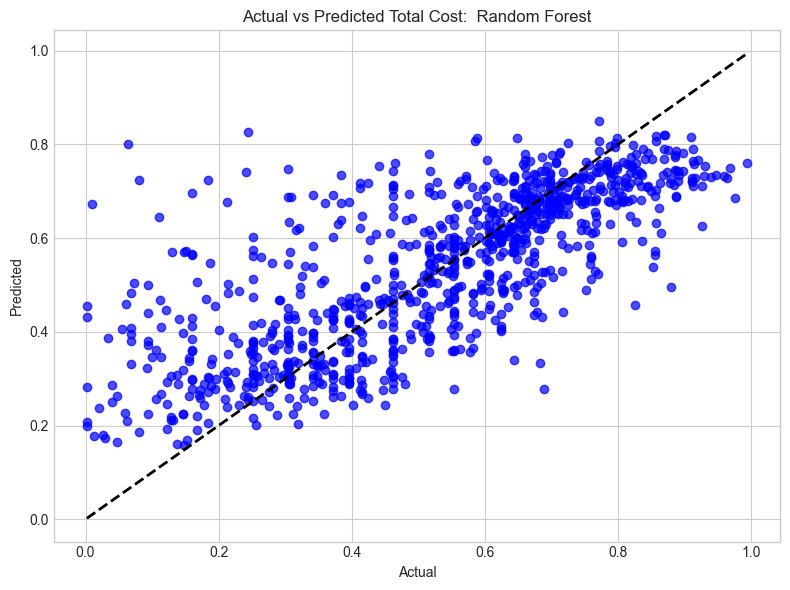


Model: Gradient Boosting
------------------------------
Training Time: 0.7633 seconds

Train DataSet
Mean Absolute Error: 0.0879
Mean Absolute Percentage Error: inf
RMSE: 0.1295
R2 Score: 0.6531
______
Test DataSet
Mean Absolute Error: 0.1070
Mean Absolute Percentage Error: 206.9503
RMSE: 0.1503
R2 Score: 0.5495
__________________________________________



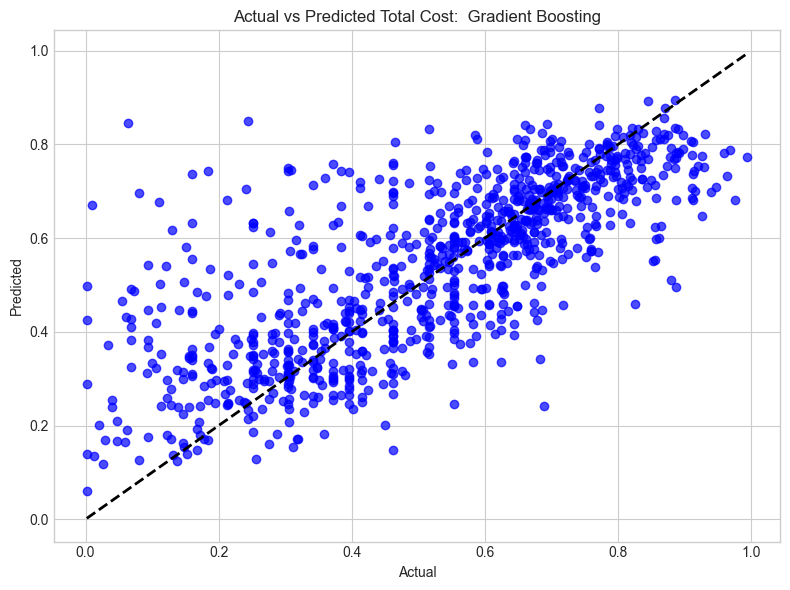


Model: AdaBoosting
------------------------------
Training Time: 0.5781 seconds

Train DataSet
Mean Absolute Error: 0.1218
Mean Absolute Percentage Error: inf
RMSE: 0.1545
R2 Score: 0.5068
______
Test DataSet
Mean Absolute Error: 0.1208
Mean Absolute Percentage Error: 192.4407
RMSE: 0.1573
R2 Score: 0.5065
__________________________________________



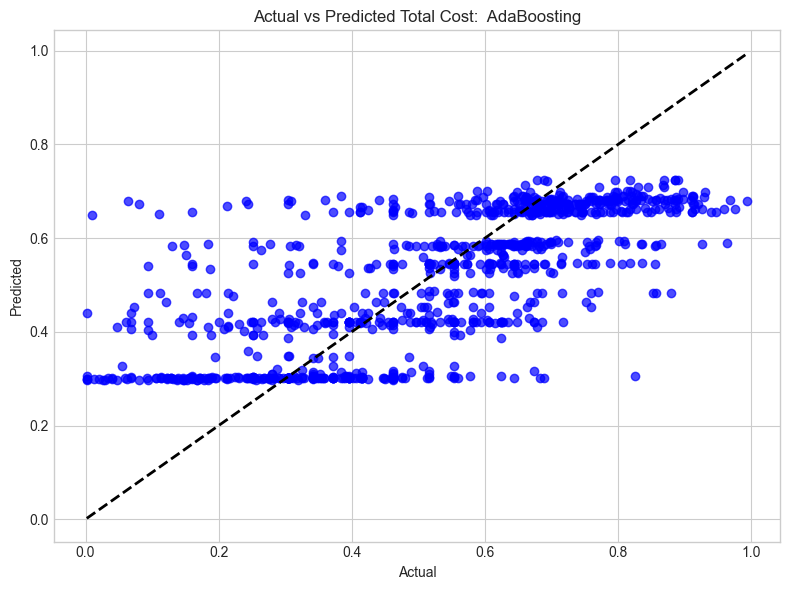


Model: AdaBoosting with GradientBoostRegressor
------------------------------
Training Time: 33.4878 seconds

Train DataSet
Mean Absolute Error: 0.0881
Mean Absolute Percentage Error: inf
RMSE: 0.1209
R2 Score: 0.6977
______
Test DataSet
Mean Absolute Error: 0.1072
Mean Absolute Percentage Error: 200.8170
RMSE: 0.1468
R2 Score: 0.5701
__________________________________________



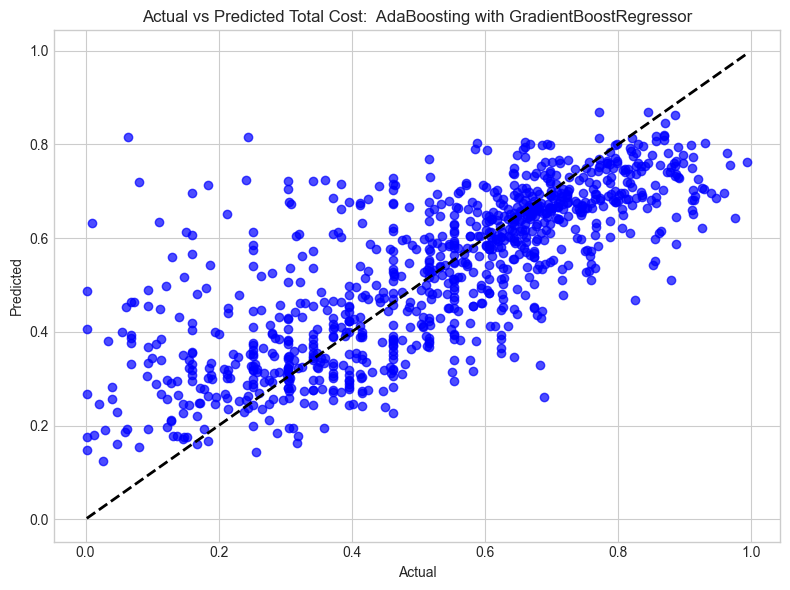


Model: XGBoost
------------------------------
Training Time: 16.4459 seconds

Train DataSet
Mean Absolute Error: 0.1017
Mean Absolute Percentage Error: inf
RMSE: 0.1353
R2 Score: 0.6216
______
Test DataSet
Mean Absolute Error: 0.1086
Mean Absolute Percentage Error: 200.2470
RMSE: 0.1467
R2 Score: 0.5707
__________________________________________



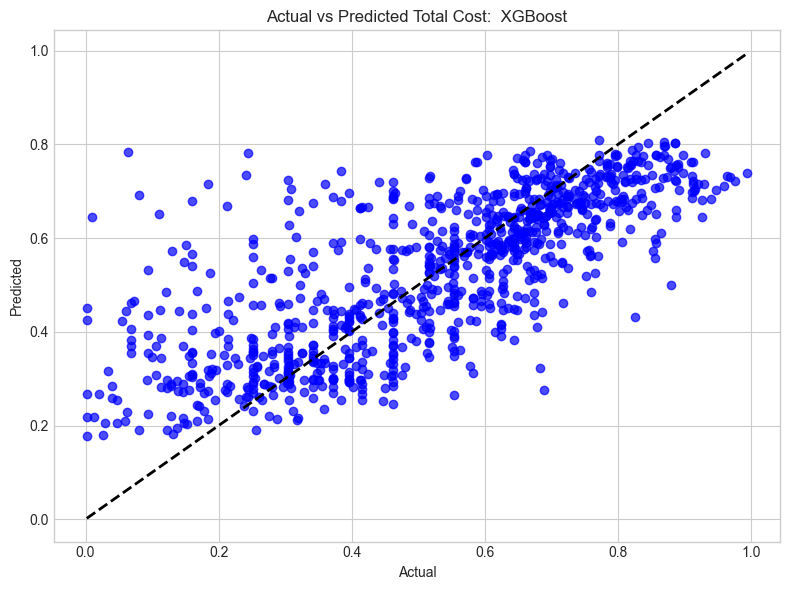

In [22]:
# 6.1 Linear Models
print("\n6.1 Training Linear Models:")


# Ridge Regression
ridge = Ridge(alpha=10.0, fit_intercept=True, solver="lsqr")
ridge_result = evaluate_model(
    ridge, "Ridge Regression", X_train, y_train, X_test, y_test
)
model_results.append(ridge_result)

# Lasso Regression
lasso = Lasso(
    alpha=0.01, fit_intercept=True, max_iter=1000, selection="random", warm_start=True
)
lasso_result = evaluate_model(
    lasso, "Lasso Regression", X_train, y_train, X_test, y_test
)
model_results.append(lasso_result)

# Elastic Net Regression
elastic_net = ElasticNet(
    alpha=0.01,
    fit_intercept=True,
    l1_ratio=0.1,
    max_iter=5000,
    selection="random",
    warm_start=True,
)
elastic_net_result = evaluate_model(
    elastic_net, "Elastic Net Regression", X_train, y_train, X_test, y_test
)
model_results.append(elastic_net_result)


# Polynomial Features with Elastic Net
poly_f = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

poly_elastic_net_pipeline = Pipeline(
    [("poly", poly_f), ("elastic_net", ElasticNet(alpha=0.01, l1_ratio=0.1))]
)

poly_elastic_net_result = evaluate_model(
    poly_elastic_net_pipeline,
    "Polynomial Features Elastic Net Regression",
    X_train,
    y_train,
    X_test,
    y_test,
)

model_results.append(poly_elastic_net_result)


# Polynomial Features with Ridge
poly_f2 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

poly_ridge_pipeline = Pipeline(
    [("poly", poly_f2), ("ridge", Ridge(alpha=100, fit_intercept=True, solver="saga"))]
)
poly_ridge_result = evaluate_model(
    poly_ridge_pipeline,
    "Polynomial Features Ridge Regression",
    X_train,
    y_train,
    X_test,
    y_test,
)
model_results.append(poly_ridge_result)


# Random Forest
rf = RandomForestRegressor(
    criterion="absolute_error",
    max_depth=20,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=RSEED,
)
rf_result = evaluate_model(rf, "Random Forest", X_train, y_train, X_test, y_test)
model_results.append(rf_result)


# Gradient Boosting
gb = GradientBoostingRegressor(
    criterion="squared_error",
    loss="absolute_error",
    max_depth=5,
    max_features="sqrt",
    n_estimators=300,
    random_state=RSEED,
)
gb_result = evaluate_model(gb, "Gradient Boosting", X_train, y_train, X_test, y_test)
model_results.append(gb_result)


# AdaBoosting
ad = AdaBoostRegressor(
    learning_rate=0.1, loss="exponential", n_estimators=50, random_state=RSEED
)
ad_result = evaluate_model(ad, "AdaBoosting", X_train, y_train, X_test, y_test)
model_results.append(ad_result)


# AdaBoost with Gradient Boosting

ab_gb = AdaBoostRegressor(
    base_estimator=gb,
    learning_rate=0.1,
    loss="exponential",
    n_estimators=50,
    random_state=RSEED,
)
ab_gb_result = evaluate_model(
    ab_gb, "AdaBoosting with GradientBoostRegressor", X_train, y_train, X_test, y_test
)
model_results.append(ab_gb_result)


# XGBoost
xgb = XGBRegressor(
    reg_lambda=0.1,
    reg_alpha=0.1,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    eval_metric="mae",
    colsample_bytree=0.5,
    booster="dart",
    random_state=RSEED,
)

xgb_result = evaluate_model(xgb, "XGBoost", X_train, y_train, X_test, y_test)
model_results.append(xgb_result)

## HYPERPARAMETER TUNING

### gridsearchcvs for models:

### some took up to 2h to run, 
### the code is in the folded cell below
### i copied the results of the gridsearches in the folded markdown after their code

In [23]:
"""ridge = Ridge()

param_grid = {
    "alpha": [0.1, 1.0, 10.0, 100.0, 1000.0],  # Regularization strength
    "fit_intercept": [True, False],  # Whether to calculate the intercept for this model
    "solver": [
        "auto",
        "svd",
        "cholesky",
        "lsqr",
        "sparse_cg",
        "sag",
        "saga",
    ],  # Solver to use in the computation
}


g_ridge = GridSearchCV(
    ridge,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
)
g_ridge.fit(X_train, y_train)


print("Best parameters for Ridge Regression:")
print(g_ridge.best_params_)
print("Best cross-validation score (neg MAE):")
print(g_ridge.best_score_)
print("Best estimator:")
print(g_ridge.best_estimator_)
tuned_model = g_ridge.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}")"""

"""lasso = Lasso()

param_grid = {
    "alpha": [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    "fit_intercept": [True, False],  # Whether to calculate the intercept for this model
    "selection": ["cyclic", "random"],  # Algorithm to use for variable selection
    "warm_start": [True, False],  # Whether to warm-start the model
    "max_iter": [1000, 5000, 10000],  # Maximum number of iterations for convergence
}


g_lasso = GridSearchCV(
    lasso, param_grid=param_grid, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1
)
g_lasso.fit(X_train, y_train)


print("Best parameters for Lasso Regression:")
print(g_lasso.best_params_)
print("Best cross-validation score (neg MAE):")
print(g_lasso.best_score_)
print("Best estimator:")
print(g_lasso.best_estimator_)
tuned_model = g_lasso.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}")"""


""" elastic_net = ElasticNet()

param_grid = {
    "l1_ratio": [0.1, 0.5, 0.7, 0.9, 1.0],
    "alpha": [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    "fit_intercept": [True, False],  # Whether to calculate the intercept for this model
    "selection": ["cyclic", "random"],  # Algorithm to use for variable selection
    "warm_start": [True, False],  # Whether to warm-start the model
    "max_iter": [1000, 5000, 10000],
}  # Maximum number of iterations for convergence

g_elastic_net = GridSearchCV(
    elastic_net,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
)
g_elastic_net.fit(X_train, y_train)


print("Best parameters for Elastic Net:")
print(g_elastic_net.best_params_)
print("Best cross-validation score (neg MAE):")
print(g_elastic_net.best_score_)
print("Best estimator:")
print(g_elastic_net.best_estimator_)
tuned_model = g_elastic_net.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}") 






rf = RandomForestRegressor()

param_grid = {
    # Function to measure the quality of a split
    "max_depth": [10, 20, 30],  # Maximum depth of the tree
    "min_samples_split": [
        2,
        5,
        10,
    ],
    "criterion": ["absolute_error"],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [ "sqrt"],
}

g_rf = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
)
g_rf.fit(X_train, y_train)


print("Best parameters for Random Forest:")
print(g_rf.best_params_)
print("Best cross-validation score (neg MAE):")
print(g_rf.best_score_)
print("Best estimator:")
print(g_rf.best_estimator_)
tuned_model = g_rf.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}")




gb = GradientBoostingRegressor()

param_grid = {
    "loss": ["absolute_error"],
    "criterion": ["squared_error"],
    "min_samples_split": [2, 5, 10],
    "max_depth": [3, 5, 7],
    "max_features": ["sqrt"],
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
}

g_gb = GridSearchCV(
    gb,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
)
g_gb.fit(X_train, y_train)


print("Best parameters for Gradient Boosting:")
print(g_gb.best_params_)
print("Best cross-validation score (neg MAE):")
print(g_gb.best_score_)
print("Best estimator:")
print(g_gb.best_estimator_)
tuned_model = g_gb.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}")





ada = AdaBoostRegressor()

param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.1, 0.5, 1.0],
    "loss": ["linear", "square", "exponential"],
}

g_ada = GridSearchCV(
    ada,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
)
g_ada.fit(X_train, y_train)


print("Best parameters for AdaBoost:")
print(g_ada.best_params_)
print("Best cross-validation score (neg MAE):")
print(g_ada.best_score_)
print("Best estimator:")
print(g_ada.best_estimator_)
tuned_model = g_ada.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}")





xgb = XGBRegressor()

param_grid = {
    "n_estimators": [200, 300],
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 7, 10],
    "gamma": [0, 0.1, 0.2],
    "colsample_bytree": [0.5, 1.0],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [0, 0.1, 0.5],
    "booster": ["gbtree", "gblinear", "dart"],
    "eval_metric": ["mae"],
}

ran_g_xgb = RandomizedSearchCV(
    xgb,
    n_iter=100,
    random_state=RSEED,
    param_distributions=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
)
ran_g_xgb.fit(X_train, y_train)


print("Best parameters for XGBoost:")
print(ran_g_xgb.best_params_)
print("Best cross-validation score (neg MAE):")
print(ran_g_xgb.best_score_)
print("Best estimator:")
print(ran_g_xgb.best_estimator_)
tuned_model = ran_g_xgb.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}")



# Polynomial Regression with ElasticNet

poly_pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures()),
        (
            "regressor",
            ElasticNet(),
        ),  # Default regressor is Ridge; can be changed in GridSearchCV
    ]
)

# Define the parameter grid for GridSearchCV
param_grid = {
    "poly__degree": [2, 3, 4, 5],  # Degrees of polynomial features
    "poly__interaction_only": [
        True,
        False,
    ],  # Whether to include only interaction terms
    "poly__include_bias": [True, False],  # Whether to include a bias column
    "regressor__alpha": [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    "regressor__l1_ratio": [0.1, 0.4, 0.8],
}

# Perform GridSearchCV
g_poly = GridSearchCV(
    poly_pipeline,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
)
g_poly.fit(X_train, y_train)

# Print results
print("Best parameters for Polynomial Regression:")
print(g_poly.best_params_)
print("Best cross-validation score (neg MAE):")
print(g_poly.best_score_)
print("Best estimator:")
print(g_poly.best_estimator_)
tuned_model = g_poly.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}")



# Polynomial Regression with Ridge

poly_pipeline_ridge = Pipeline(
    [
        ("poly", PolynomialFeatures()),
        (
            "regressor",
            Ridge(),
        ),  # Default regressor is Ridge; can be changed in GridSearchCV
    ]
)

# Define the parameter grid for GridSearchCV
param_grid = {
    "poly__degree": [2, 3, 4, 5],  # Degrees of polynomial features
    "poly__interaction_only": [
        True,
        False,
    ],  # Whether to include only interaction terms
    "poly__include_bias": [True, False],  # Whether to include a bias column
    "regressor__alpha": [0.1, 1.0, 10.0, 100],  # Regularization strength
    "regressor__fit_intercept": [True],
    # Whether to calculate the intercept for this model
    "regressor__solver": ["auto", "svd", "cholesky", "lsqr", "sag", "saga"],
}

# Perform GridSearchCV
g_poly_ridge = GridSearchCV(
    poly_pipeline_ridge,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1,
)
g_poly_ridge.fit(X_train, y_train)

# Print results
print("Best parameters for Polynomial Regression:")
print(g_poly_ridge.best_params_)
print("Best cross-validation score (neg MAE):")
print(g_poly_ridge.best_score_)
print("Best estimator:")
print(g_poly_ridge.best_estimator_)
tuned_model = g_poly_ridge.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Tuned model MAE on validation set: {mae_tuned:.4f}")
print(f"Tuned model R² on validation set: {r2_tuned:.4f}")"""

' elastic_net = ElasticNet()\n\nparam_grid = {\n    "l1_ratio": [0.1, 0.5, 0.7, 0.9, 1.0],\n    "alpha": [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength\n    "fit_intercept": [True, False],  # Whether to calculate the intercept for this model\n    "selection": ["cyclic", "random"],  # Algorithm to use for variable selection\n    "warm_start": [True, False],  # Whether to warm-start the model\n    "max_iter": [1000, 5000, 10000],\n}  # Maximum number of iterations for convergence\n\ng_elastic_net = GridSearchCV(\n    elastic_net,\n    param_grid=param_grid,\n    scoring="neg_mean_absolute_error",\n    cv=5,\n    n_jobs=-1,\n)\ng_elastic_net.fit(X_train, y_train)\n\n\nprint("Best parameters for Elastic Net:")\nprint(g_elastic_net.best_params_)\nprint("Best cross-validation score (neg MAE):")\nprint(g_elastic_net.best_score_)\nprint("Best estimator:")\nprint(g_elastic_net.best_estimator_)\ntuned_model = g_elastic_net.best_estimator_\ny_pred_tuned = tuned_model.predict(X_test)\nm

#### Best parameters for Ridge Regression:

{'alpha': 10.0, 'fit_intercept': True, 'solver': 'lsqr'}

Best cross-validation score (neg MAE):
-0.11091879093399815


Best estimator:
Ridge(alpha=10.0, solver='lsqr')


Tuned model MAE on validation set: 0.1127
Tuned model R² on validation set: 0.5541
#### Best parameters for Lasso Regression:
{'alpha': 0.01, 
'fit_intercept': True, 
'max_iter': 1000, 
'selection': 'random', 
'warm_start': True}

Best cross-validation score (neg MAE):
-0.13338454191169055

Best estimator:
Lasso(alpha=0.01, selection='random', warm_start=True)

Tuned model MAE on validation set: 0.1343
Tuned model R² on validation set: 0.4052
#### Best parameters for Elastic Net:
{'alpha': 0.01, 
'fit_intercept': True, 
'l1_ratio': 0.1, 
'max_iter': 5000, 
'selection': 'random', 
'warm_start': True}

Best cross-validation score (neg MAE):
-0.11519132791774847

Best estimator:
ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=5000, selection='random',
           warm_start=True)

Tuned model MAE on validation set: 0.1169
Tuned model R² on validation set: 0.5215

#### Best parameters for Random Forest:


{'criterion': 'absolute_error', 
'max_depth': 20, 
'max_features': 'sqrt', 
'min_samples_leaf': 1, 
'min_samples_split': 10}


Best cross-validation score (neg MAE):
-0.10614437315161032


Best estimator:
RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', min_samples_split=10)

                      
Tuned model MAE on validation set: 0.1084
Tuned model R² on validation set: 0.564



#### Best parameters for Gradient Boosting:

{'criterion': 'squared_error', 
'learning_rate': 0.1, 
'loss': 'absolute_error',
'max_depth': 5,
'max_features': 'sqrt', 
'min_samples_split': 2,
 'n_estimators': 300}


Best cross-validation score (neg MAE):
-0.10407430105214796


Best estimator:
GradientBoostingRegressor(criterion='squared_error', loss='absolute_error',
                          max_depth=5, max_features='sqrt', n_estimators=300)

                          
Tuned model MAE on validation set: 0.1076
Tuned model R² on validation set: 0.5521



#### Best parameters for AdaBoost:

{'learning_rate': 0.1, 
'loss': 'exponential', 
'n_estimators': 50}



Best cross-validation score (neg MAE):
-0.12222249459794518



Best estimator:
AdaBoostRegressor(learning_rate=0.1, loss='exponential')


Tuned model MAE on validation set: 0.1217
Tuned model R² on validation set: 0.5105



#### Best parameters for XGBoost RANDOMIZEDSEARCH:


{'reg_lambda': 0.1, 
'reg_alpha': 0.1, 
'n_estimators': 300, 
'max_depth': 5, 
'learning_rate': 0.1, 
'gamma': 0.1, 
'eval_metric': 'mae', 
'colsample_bytree': 0.5, 
'booster': 'dart'}


Best cross-validation score (neg MAE):
-0.10915079729649615


Best estimator:
XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

             
Tuned model MAE on validation set: 0.1091
Tuned model R² on validation set: 0.5713




#### Best parameters for Polynomial Regression: Elastic Net


{'poly__degree': 2, 
'poly__include_bias': True, 
'poly__interaction_only': False, 
'regressor__alpha': 0.01, 
'regressor__l1_ratio': 0.1}


Best cross-validation score (neg MAE):
-0.11405913862712531


Best estimator:
Pipeline(steps=[('poly', PolynomialFeatures()),
                ('regressor', ElasticNet(alpha=0.01, l1_ratio=0.1))])

                
Tuned model MAE on validation set: 0.1164
Tuned model R² on validation set: 0.5268



#### Best parameters for Polynomial Regression:


{'poly__degree': 2, 
'poly__include_bias': False, 
'poly__interaction_only': False, 
'regressor__alpha': 100,
 'regressor__fit_intercept': True, 
 'regressor__solver': 'saga'}


Best cross-validation score (neg MAE):
-0.11170718681855514


Best estimator:
Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('regressor', Ridge(alpha=100, solver='saga'))])

                
Tuned model MAE on validation set: 0.1139
Tuned model R² on validation set: 0.5544

## Ranking the models

In [24]:
# Sort models by MAE (lower is better)
sorted_models = sorted(model_results, key=lambda x: x["mae_test"])
best_model_info = sorted_models[0]
print(
    f"Best performing model: {best_model_info['name']} with MAE: {best_model_info['mae_test']:.4f} and R²: {best_model_info['r2_test']:.4f}"
)

Best performing model: Gradient Boosting with MAE: 0.1070 and R²: 0.5495


In [25]:
sorted_models

[{'model': GradientBoostingRegressor(criterion='squared_error', loss='absolute_error',
                            max_depth=5, max_features='sqrt', n_estimators=300,
                            random_state=42),
  'name': 'Gradient Boosting',
  'rmse_train': 0.12954142148666783,
  'mae_train': 0.08792419644977033,
  'r2_train': 0.6530632884890772,
  'rmse_test': 0.15028340616651928,
  'mae_test': 0.1070151017877223,
  'r2_test': 0.5494518564858908,
  'training_time': 0.7633118629455566},
 {'model': AdaBoostRegressor(base_estimator=GradientBoostingRegressor(criterion='squared_error',
                                                             loss='absolute_error',
                                                             max_depth=5,
                                                             max_features='sqrt',
                                                             n_estimators=300,
                                                             random_state=42),
           

## FEATURE IMPORTANCE ANALYSIS

In [26]:
best_model = best_model_info["model"]


FEATURE IMPORTANCE ANALYSIS for best model
Top 15 important features:
                           Feature  Importance
138  tour_arrangement_Package Tour    0.108478
117   purpose_Leisure and Holidays    0.106859
5                     total_people    0.073342
4                     total_nights    0.067475
139      package_transport_int_Yes    0.043457
3                   night_zanzibar    0.041946
2                   night_mainland    0.041587
140       package_accomodation_Yes    0.039885
142       package_transport_tz_Yes    0.034023
144        package_guided_tour_Yes    0.031550
0                     total_female    0.024992
141               package_food_Yes    0.022274
143        package_sightseeing_Yes    0.021966
146       payment_mode_Credit Card    0.017651
1                       total_male    0.016441


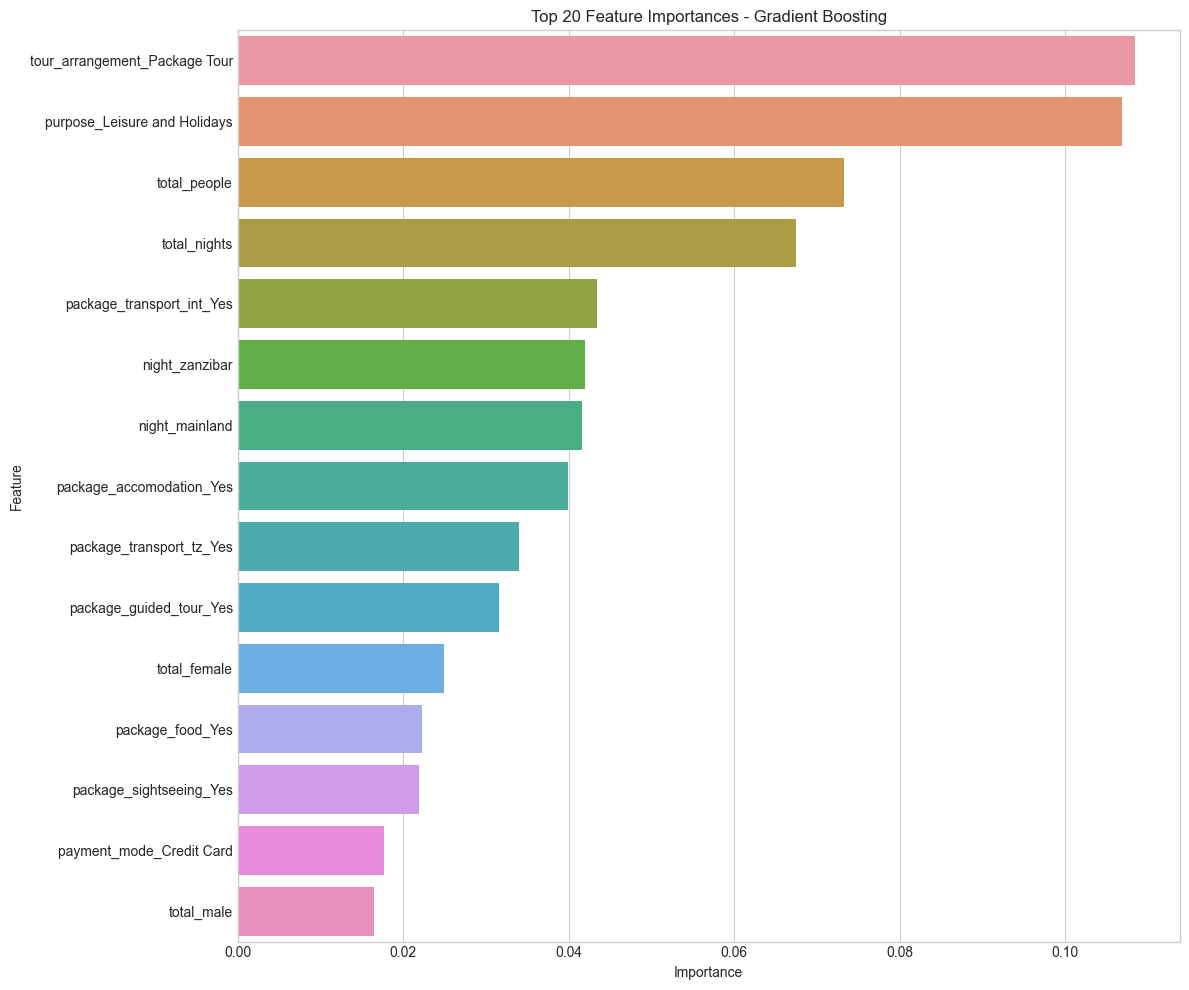

In [27]:
# Analyze which features have the most impact on predictions

print("\nFEATURE IMPORTANCE ANALYSIS for best model")
print("=" * 50)


if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    feature_names = X_train.columns

    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame(
        {"Feature": feature_names, "Importance": feature_importances}
    ).sort_values(by="Importance", ascending=False)

    # Save top 15 features
    top_features = importance_df.head(15)
    # top_features.to_csv("../reports/feature_importance.csv", index=False)

    print("Top 15 important features:")
    print(top_features)

    # Create feature importance plot
    plt.figure(figsize=(12, 10))
    sns.barplot(x="Importance", y="Feature", data=top_features)
    plt.title(f'Top 20 Feature Importances - {best_model_info["name"]}')
    plt.tight_layout()
    # plt.savefig("../reports/figures/feature_importance.png")
    plt.show()
else:
    print("Feature importance not available for this model type.")

## MODEL EVALUATION AND COMPARISON


STEP 9 - MODEL EVALUATION AND COMPARISON
Models ranked by MAE:
                                         Model      RMSE       MAE        R²   
0                            Gradient Boosting  0.150283  0.107015  0.549452  \
1      AdaBoosting with GradientBoostRegressor  0.146791  0.107158  0.570150   
2                                Random Forest  0.147998  0.107794  0.563053   
3                                      XGBoost  0.146699  0.108622  0.570687   
4                             Ridge Regression  0.149603  0.111374  0.553522   
5         Polynomial Features Ridge Regression  0.149720  0.112701  0.552823   
6   Polynomial Features Elastic Net Regression  0.154227  0.115232  0.525496   
7                       Elastic Net Regression  0.155122  0.115742  0.519975   
8                                  AdaBoosting  0.157286  0.120814  0.506484   
9                             Lasso Regression  0.172570  0.132630  0.405911   
10                  Baseline Model - Lin. Reg.  1.180131

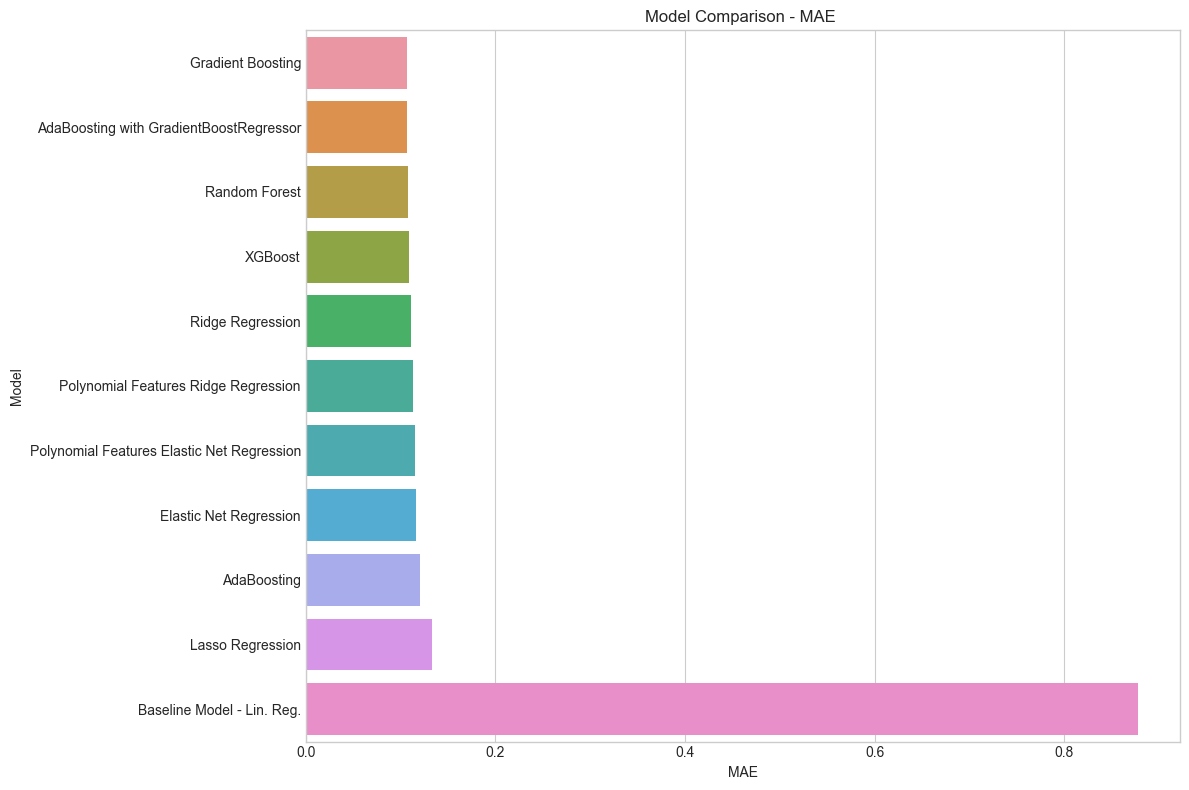

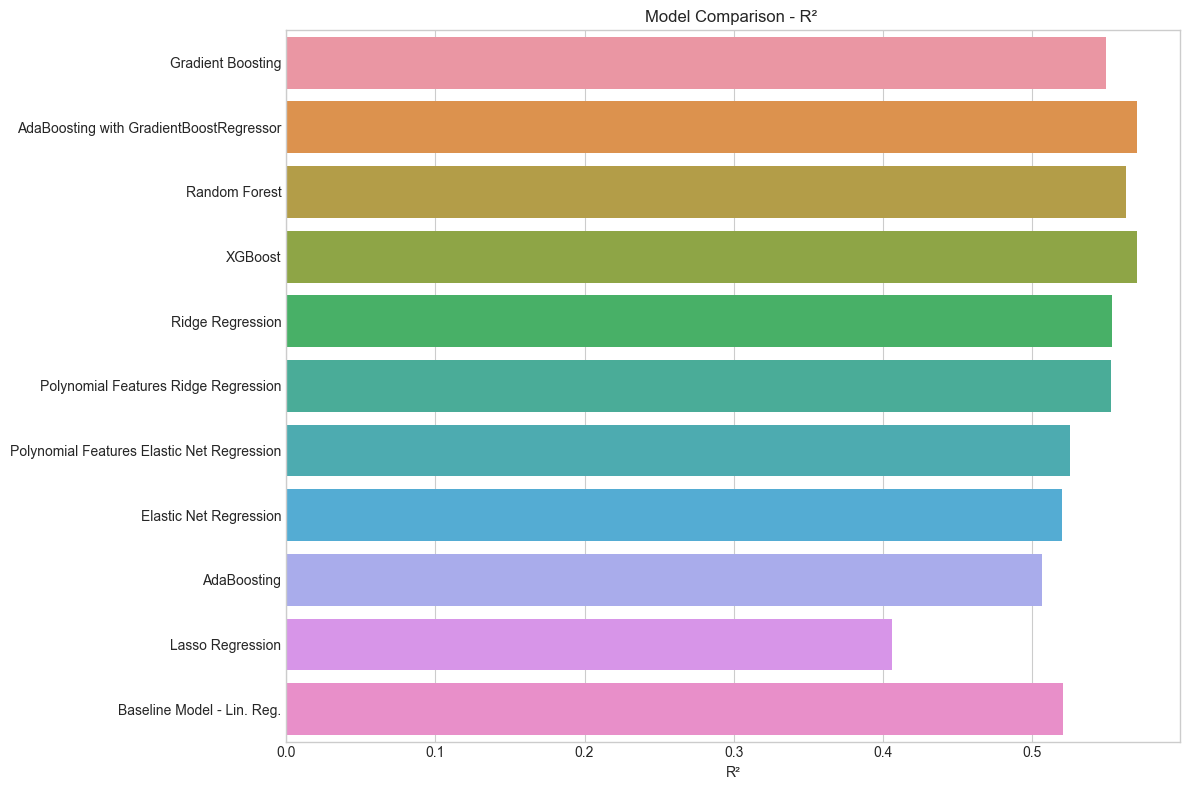

In [28]:
# Compare performance of different models

print("\nSTEP 9 - MODEL EVALUATION AND COMPARISON")
print("=" * 50)

# Create comparison DataFrame
comparison_df = pd.DataFrame(
    [
        {
            "Model": model["name"],
            "RMSE": model["rmse_test"],
            "MAE": model["mae_test"],
            # "MAE (TZS)": model["mae_tz"],
            # "MAE (EUR)": model["mae_eur"],
            "R²": model["r2_test"],
            "Training Time (s)": model["training_time"],
        }
        for model in sorted_models
    ]
)

# print("Models ranked by RMSE (lower is better):")
print("Models ranked by MAE:")
print(comparison_df)

# Create comparison plots
plt.figure(figsize=(12, 8))
model_names = [model["name"] for model in sorted_models]
# rmse_values = [model["rmse"] for model in sorted_models]
mae_values = [model["mae_test"] for model in sorted_models]
# mae_values_tz = [model["mae_tz"] for model in sorted_models]
# mae_values_eur = [model["mae_eur"] for model in sorted_models]

sns.barplot(x=mae_values, y=model_names)
# sns.barplot(x=rmse_values, y=model_names)
plt.title("Model Comparison - MAE ")
plt.xlabel("MAE")

plt.ylabel("Model")
# plt.bar_label(plt.bar(x=mae_values_tz, y=model_names), fmt="%.2f")
plt.tight_layout()
# plt.savefig("../reports/figures/model_comparison_mae.png")
plt.show()

# R² comparison
plt.figure(figsize=(12, 8))
r2_values = [model["r2_test"] for model in sorted_models]

sns.barplot(x=r2_values, y=model_names)
plt.title("Model Comparison - R² ")
plt.xlabel("R²")
plt.tight_layout()
# plt.savefig("../reports/figures/model_comparison_r2.png")
plt.show()


STEP 9 - MODEL EVALUATION AND COMPARISON
Models ranked by MAE:
                                        Model      RMSE       MAE        R²   
0                           Gradient Boosting  0.150283  0.107015  0.549452  \
1     AdaBoosting with GradientBoostRegressor  0.146791  0.107158  0.570150   
2                               Random Forest  0.147998  0.107794  0.563053   
3                                     XGBoost  0.146699  0.108622  0.570687   
4                            Ridge Regression  0.149603  0.111374  0.553522   
5        Polynomial Features Ridge Regression  0.149720  0.112701  0.552823   
6  Polynomial Features Elastic Net Regression  0.154227  0.115232  0.525496   
7                      Elastic Net Regression  0.155122  0.115742  0.519975   
8                                 AdaBoosting  0.157286  0.120814  0.506484   
9                            Lasso Regression  0.172570  0.132630  0.405911   

   Training Time (s)  
0           0.763312  
1          33.487770

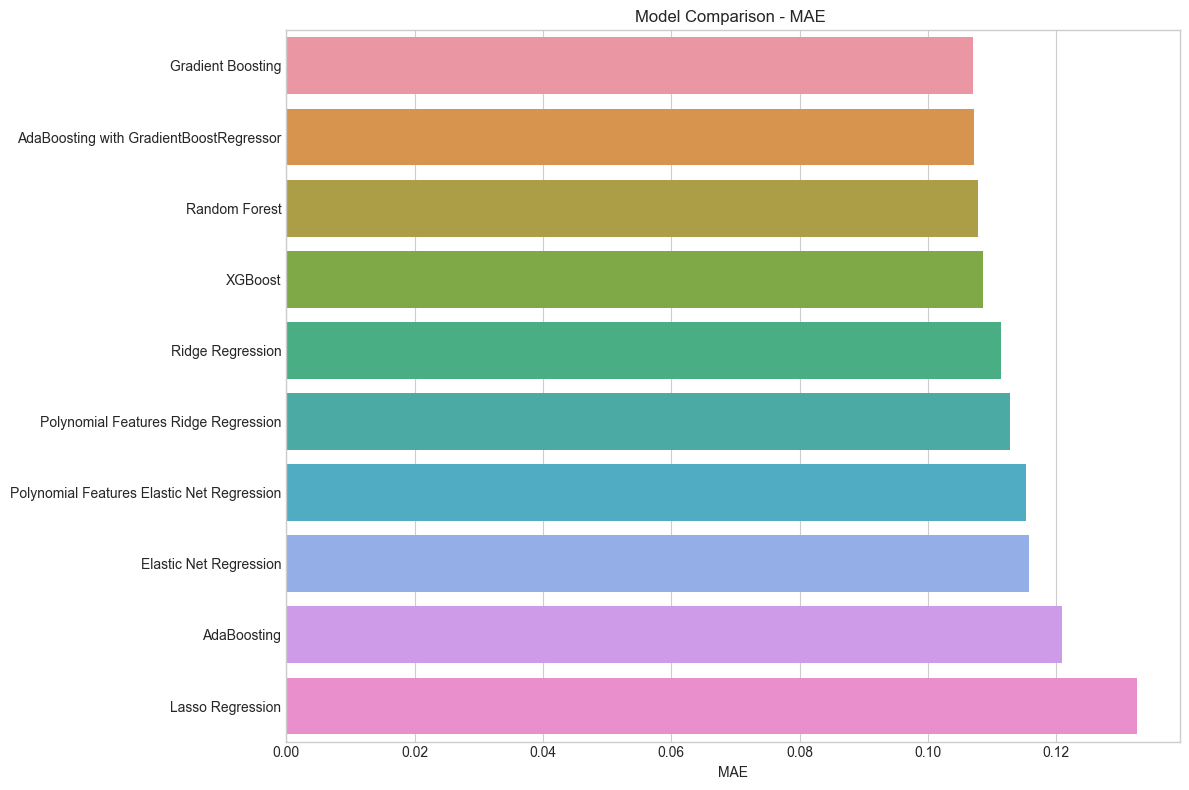

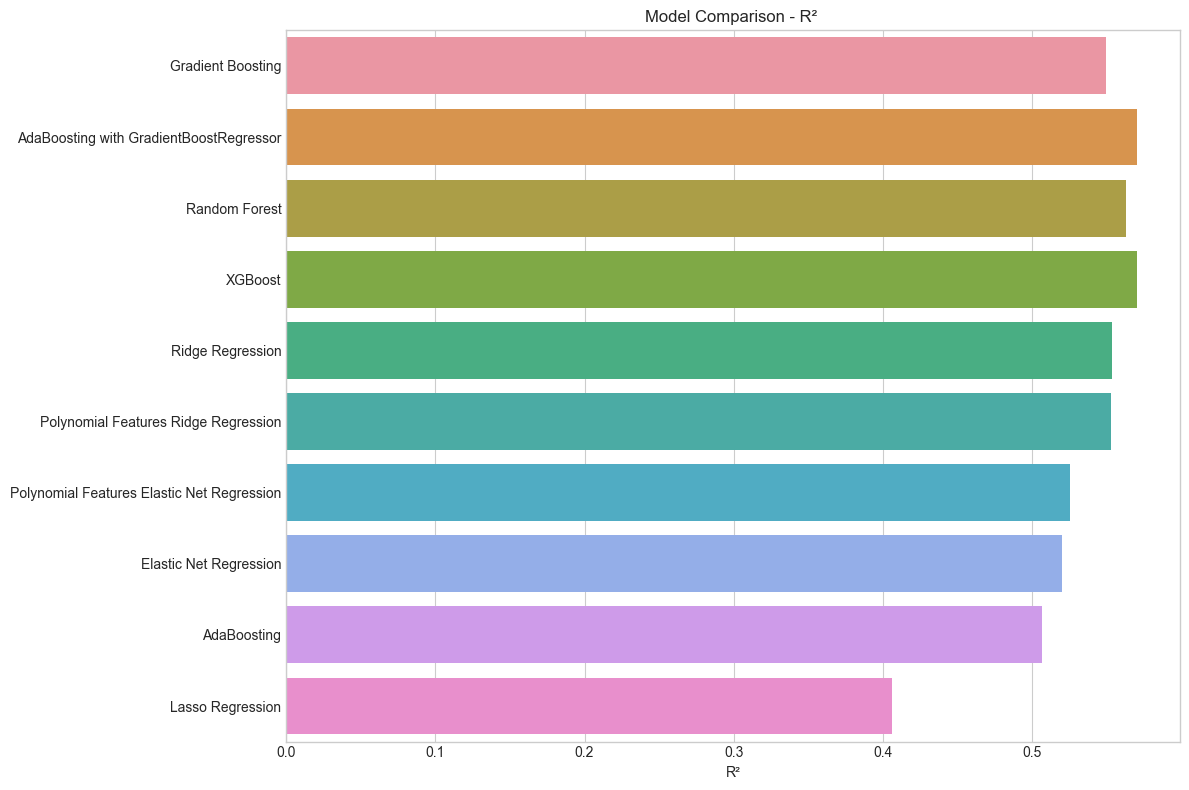

In [29]:
# Compare performance of different models without baselinne model

print("\nSTEP 9 - MODEL EVALUATION AND COMPARISON")
print("=" * 50)


model_results2 = model_results.copy()
model_results2.pop(0)  # Remove the baseline model from the list


sorted_models2 = sorted(model_results2, key=lambda x: x["mae_test"])
best_model_info = sorted_models2[0]

# Create comparison DataFrame
comparison_df2 = pd.DataFrame(
    [
        {
            "Model": model["name"],
            "RMSE": model["rmse_test"],
            "MAE": model["mae_test"],
            # "MAE (TZS)": model["mae_tz"],
            # "MAE (EUR)": model["mae_eur"],
            "R²": model["r2_test"],
            "Training Time (s)": model["training_time"],
        }
        for model in sorted_models2
    ]
)

# print("Models ranked by RMSE (lower is better):")
print("Models ranked by MAE:")
print(comparison_df2)

# Create comparison plots
plt.figure(figsize=(12, 8))
model_names2 = [model["name"] for model in sorted_models2]
# rmse_values = [model["rmse"] for model in sorted_models]
mae_values2 = [model["mae_test"] for model in sorted_models2]
# mae_values_tz = [model["mae_tz"] for model in sorted_models2]  # Added TZS MAE values
# mae_values_eur = [model["mae_eur"] for model in sorted_models2]  # Added EUR MAE values

sns.barplot(x=mae_values2, y=model_names2)

plt.title("Model Comparison - MAE ")
plt.xlabel("MAE")

# plt.bar_label(plt.bar(x=mae_values_tz, y=model_names2), fmt="%.2f")
plt.tight_layout()
# plt.savefig("../reports/figures/model_comparison_mae.png")
plt.show()

# R² comparison
plt.figure(figsize=(12, 8))
r2_values = [model["r2_test"] for model in sorted_models2]

sns.barplot(x=r2_values, y=model_names2)
plt.title("Model Comparison - R² ")
plt.xlabel("R²")
plt.tight_layout()
# plt.savefig("../reports/figures/model_comparison_r2.png")
plt.show()

## (generate predictions for submission on zindi)

In [30]:
# Apply the best model to make predictions on the test set for submission

"""print("\nSTEP 10 - GENERATE PREDICTIONS")
print("=" * 50)


# Store test IDs for submission,
test = pd.read_csv("data/test.csv")
test_ids = test["ID"]
test = test.drop(columns=["ID"])
# same as train set:
 test = test.loc[
    ~(
        (test["total_female"].isna() | (test["total_female"] == 0))
        & (test["total_male"].isna() | (test["total_male"] == 0))
    )
]
test["continent"] = test["country"].map(country_to_continent)
test[["total_female", "total_male"]] = test[["total_female", "total_male"]].fillna(0)
test["most_impressing"] = test["most_impressing"].fillna("Friendly People")
test["total_people"] = test["total_female"] + test["total_male"]
test["total_nights"] = test["night_mainland"] + test["night_zanzibar"]
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)


# Make predictions on test set using the best model
test_predictions_log = best_model.predict(test)

# Transform predictions back to original scale
test_predictions = np.expm1(test_predictions_log)

# Create submission DataFrame
submission_df = pd.DataFrame({"ID": test_ids, "total_cost": test_predictions})

# Save submission file
submission_df.to_csv("../data/processed/submission.csv", index=False)
print(f"Predictions saved to ../data/processed/submission.csv")

# Display sample predictions
print("\nSample predictions:")
print(submission_df.head(10))"""

'print("\nSTEP 10 - GENERATE PREDICTIONS")\nprint("=" * 50)\n\n\n# Store test IDs for submission,\ntest = pd.read_csv("data/test.csv")\ntest_ids = test["ID"]\ntest = test.drop(columns=["ID"])\n# same as train set:\n test = test.loc[\n    ~(\n        (test["total_female"].isna() | (test["total_female"] == 0))\n        & (test["total_male"].isna() | (test["total_male"] == 0))\n    )\n]\ntest["continent"] = test["country"].map(country_to_continent)\ntest[["total_female", "total_male"]] = test[["total_female", "total_male"]].fillna(0)\ntest["most_impressing"] = test["most_impressing"].fillna("Friendly People")\ntest["total_people"] = test["total_female"] + test["total_male"]\ntest["total_nights"] = test["night_mainland"] + test["night_zanzibar"]\ntest = pd.get_dummies(test, columns=categorical_cols, drop_first=True)\n\n\n# Make predictions on test set using the best model\ntest_predictions_log = best_model.predict(test)\n\n# Transform predictions back to original scale\ntest_predictions = 

## DATA PRODUCT CONCEPT


STEP 11 - DATA PRODUCT CONCEPT


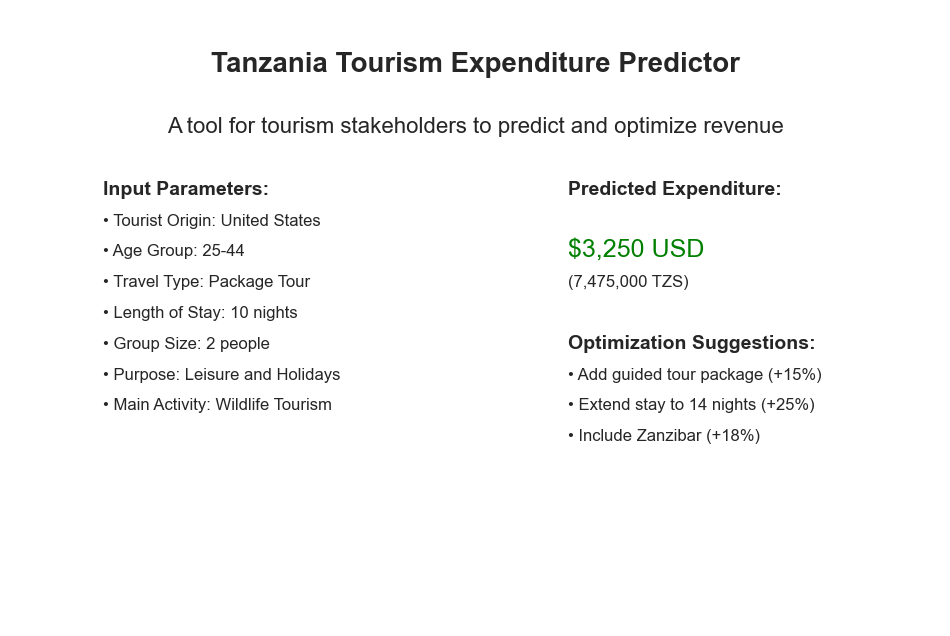

Data product concept visualization created.


In [32]:
# Create a mockup of a potential data product

print("\nSTEP 11 - DATA PRODUCT CONCEPT")
print("=" * 50)

# Create a simple mockup of a data product
plt.figure(figsize=(12, 8))
plt.subplot(1, 1, 1)
plt.text(
    0.5,
    0.9,
    "Tanzania Tourism Expenditure Predictor",
    horizontalalignment="center",
    fontsize=20,
    fontweight="bold",
)
plt.text(
    0.5,
    0.8,
    "A tool for tourism stakeholders to predict and optimize revenue",
    horizontalalignment="center",
    fontsize=16,
)

# Add mockup elements
plt.text(0.1, 0.7, "Input Parameters:", fontsize=14, fontweight="bold")
plt.text(0.1, 0.65, "• Tourist Origin: United States", fontsize=12)
plt.text(0.1, 0.6, "• Age Group: 25-44", fontsize=12)
plt.text(0.1, 0.55, "• Travel Type: Package Tour", fontsize=12)
plt.text(0.1, 0.5, "• Length of Stay: 10 nights", fontsize=12)
plt.text(0.1, 0.45, "• Group Size: 2 people", fontsize=12)
plt.text(0.1, 0.4, "• Purpose: Leisure and Holidays", fontsize=12)
plt.text(0.1, 0.35, "• Main Activity: Wildlife Tourism", fontsize=12)

plt.text(0.6, 0.7, "Predicted Expenditure:", fontsize=14, fontweight="bold")
plt.text(0.6, 0.6, "$3,250 USD", fontsize=18, color="green")
plt.text(0.6, 0.55, "(7,475,000 TZS)", fontsize=12)

plt.text(0.6, 0.45, "Optimization Suggestions:", fontsize=14, fontweight="bold")
plt.text(0.6, 0.4, "• Add guided tour package (+15%)", fontsize=12)
plt.text(0.6, 0.35, "• Extend stay to 14 nights (+25%)", fontsize=12)
plt.text(0.6, 0.3, "• Include Zanzibar (+18%)", fontsize=12)

# Remove axes
plt.axis("off")
plt.savefig("../data/data_product_concept.png", bbox_inches="tight")
plt.show()

print("Data product concept visualization created.")

## CONCLUSION AND RECOMMENDATIONS

In [33]:
# Summarize findings and provide recommendations

print("\nSTEP 12 - CONCLUSION AND RECOMMENDATIONS")
print("=" * 50)

print(
    """
Key findings from the Tanzania Tourism Prediction project:

1. The Gradient Boosting model performed best with MAE of {:.4f} and R² of {:.4f}.
"""
    # MAE in TZS: {:.4f}
    # MAE in EUR: {:.4f}
    """

2. Top factors influencing tourist expenditure:
   - Package tours (vs. independent travel)
   - Leisure and holiday travel purpose
   - Length of stay (total nights)
   - Group size (total people)
   - Accommodation packages

3. Recommendations for tourism stakeholders:
   - Develop comprehensive package tours
   - Target leisure travelers
   - Encourage extended stays
   - Cater to group travel
   

4. A data product could help tourism stakeholders predict and optimize revenue
   based on tourist profiles and travel arrangements.
""".format(
        best_model_info["mae_test"],
        best_model_info["r2_test"],
        # best_model_info["mae_tz"],
        # best_model_info["mae_eur"],
    )
)


STEP 12 - CONCLUSION AND RECOMMENDATIONS

Key findings from the Tanzania Tourism Prediction project:

1. The Gradient Boosting model performed best with MAE of 0.1070 and R² of 0.5495.


2. Top factors influencing tourist expenditure:
   - Package tours (vs. independent travel)
   - Leisure and holiday travel purpose
   - Length of stay (total nights)
   - Group size (total people)
   - Accommodation packages

3. Recommendations for tourism stakeholders:
   - Develop comprehensive package tours
   - Target leisure travelers
   - Encourage extended stays
   - Cater to group travel
   

4. A data product could help tourism stakeholders predict and optimize revenue
   based on tourist profiles and travel arrangements.

